In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm

## **PCA Analysis**

In [2]:
def save_dict_list_as(dic, file_name):
    with open(file_name, 'wb') as file:
        pickle.dump(dic, file)
    return 0
    

def load_dict_list(file_name):
    with open(file_name, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

In [3]:
data = pd.read_csv('data_set/data_for_analysis.csv')
features = load_dict_list("Food_group/features.pkl")
macro = load_dict_list("Food_group/Macronutrients.pkl")

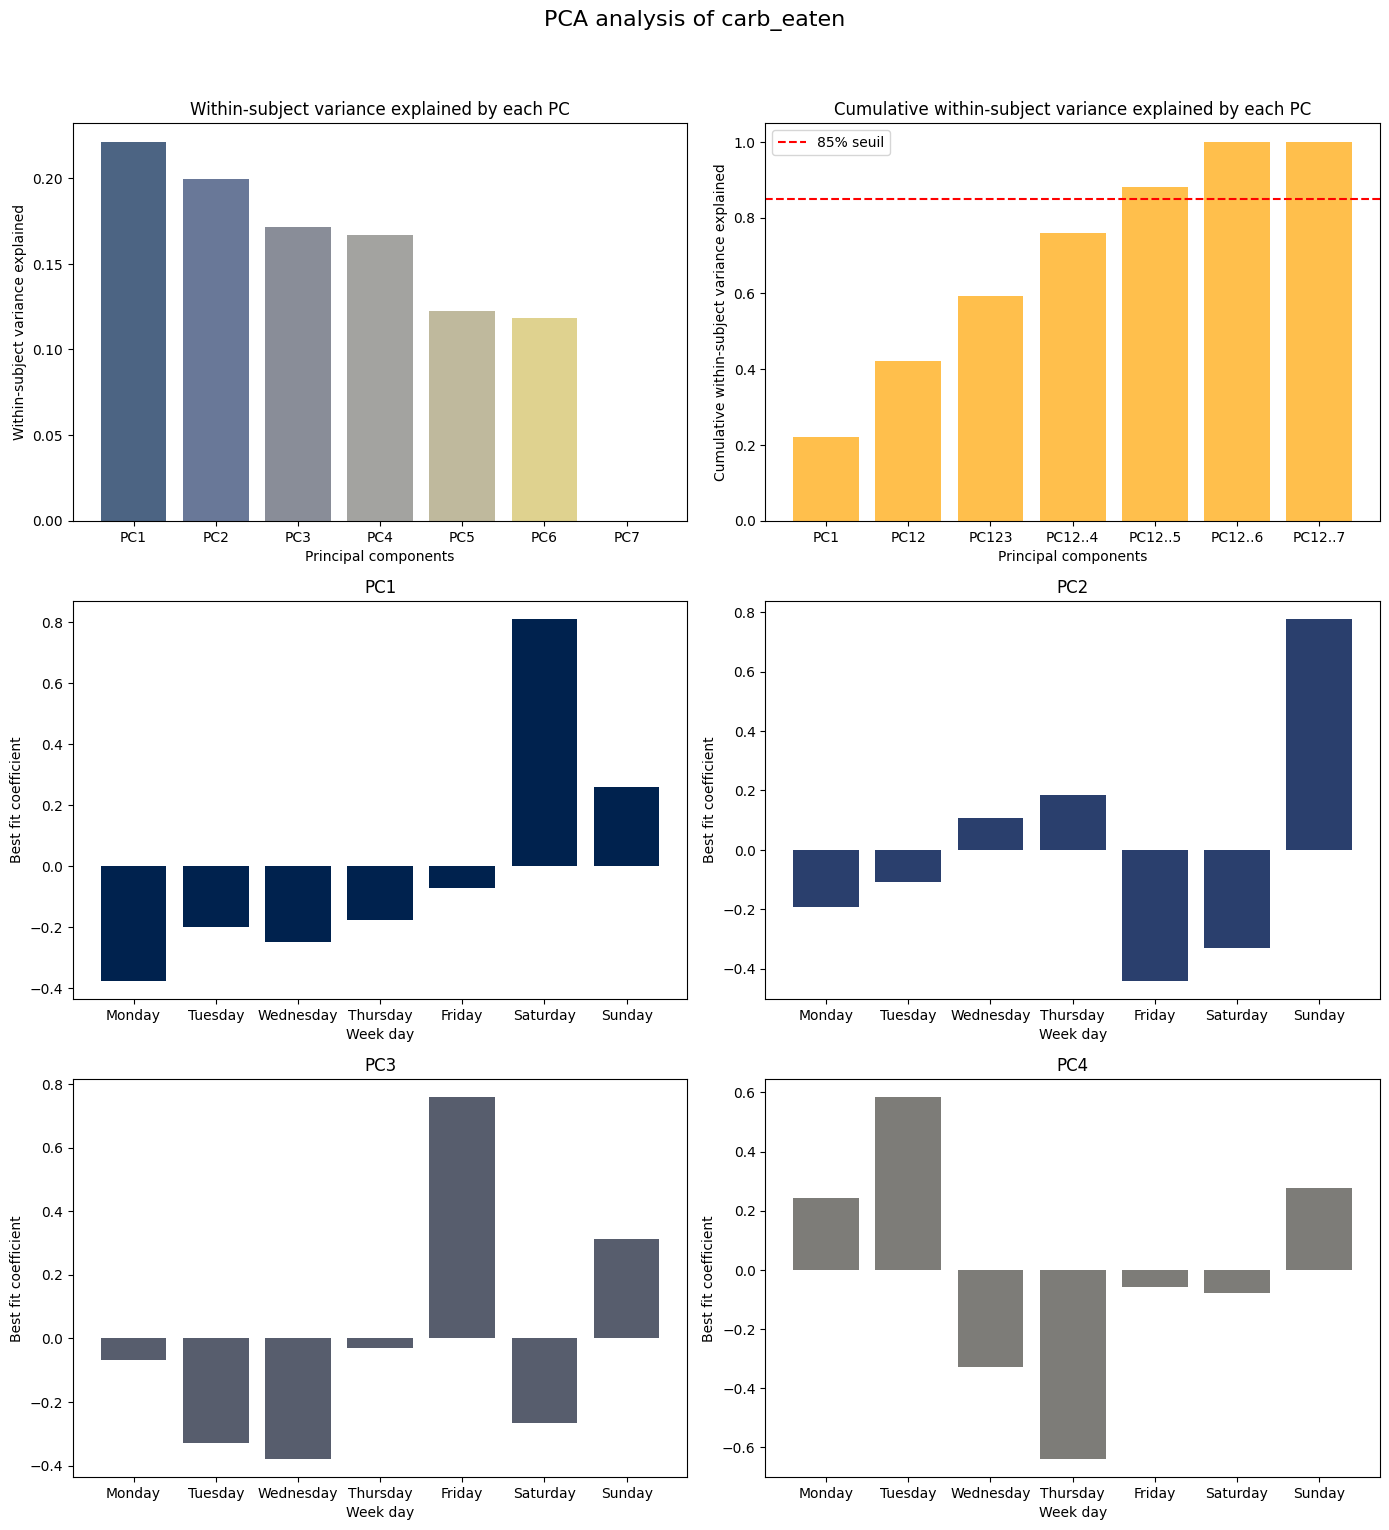

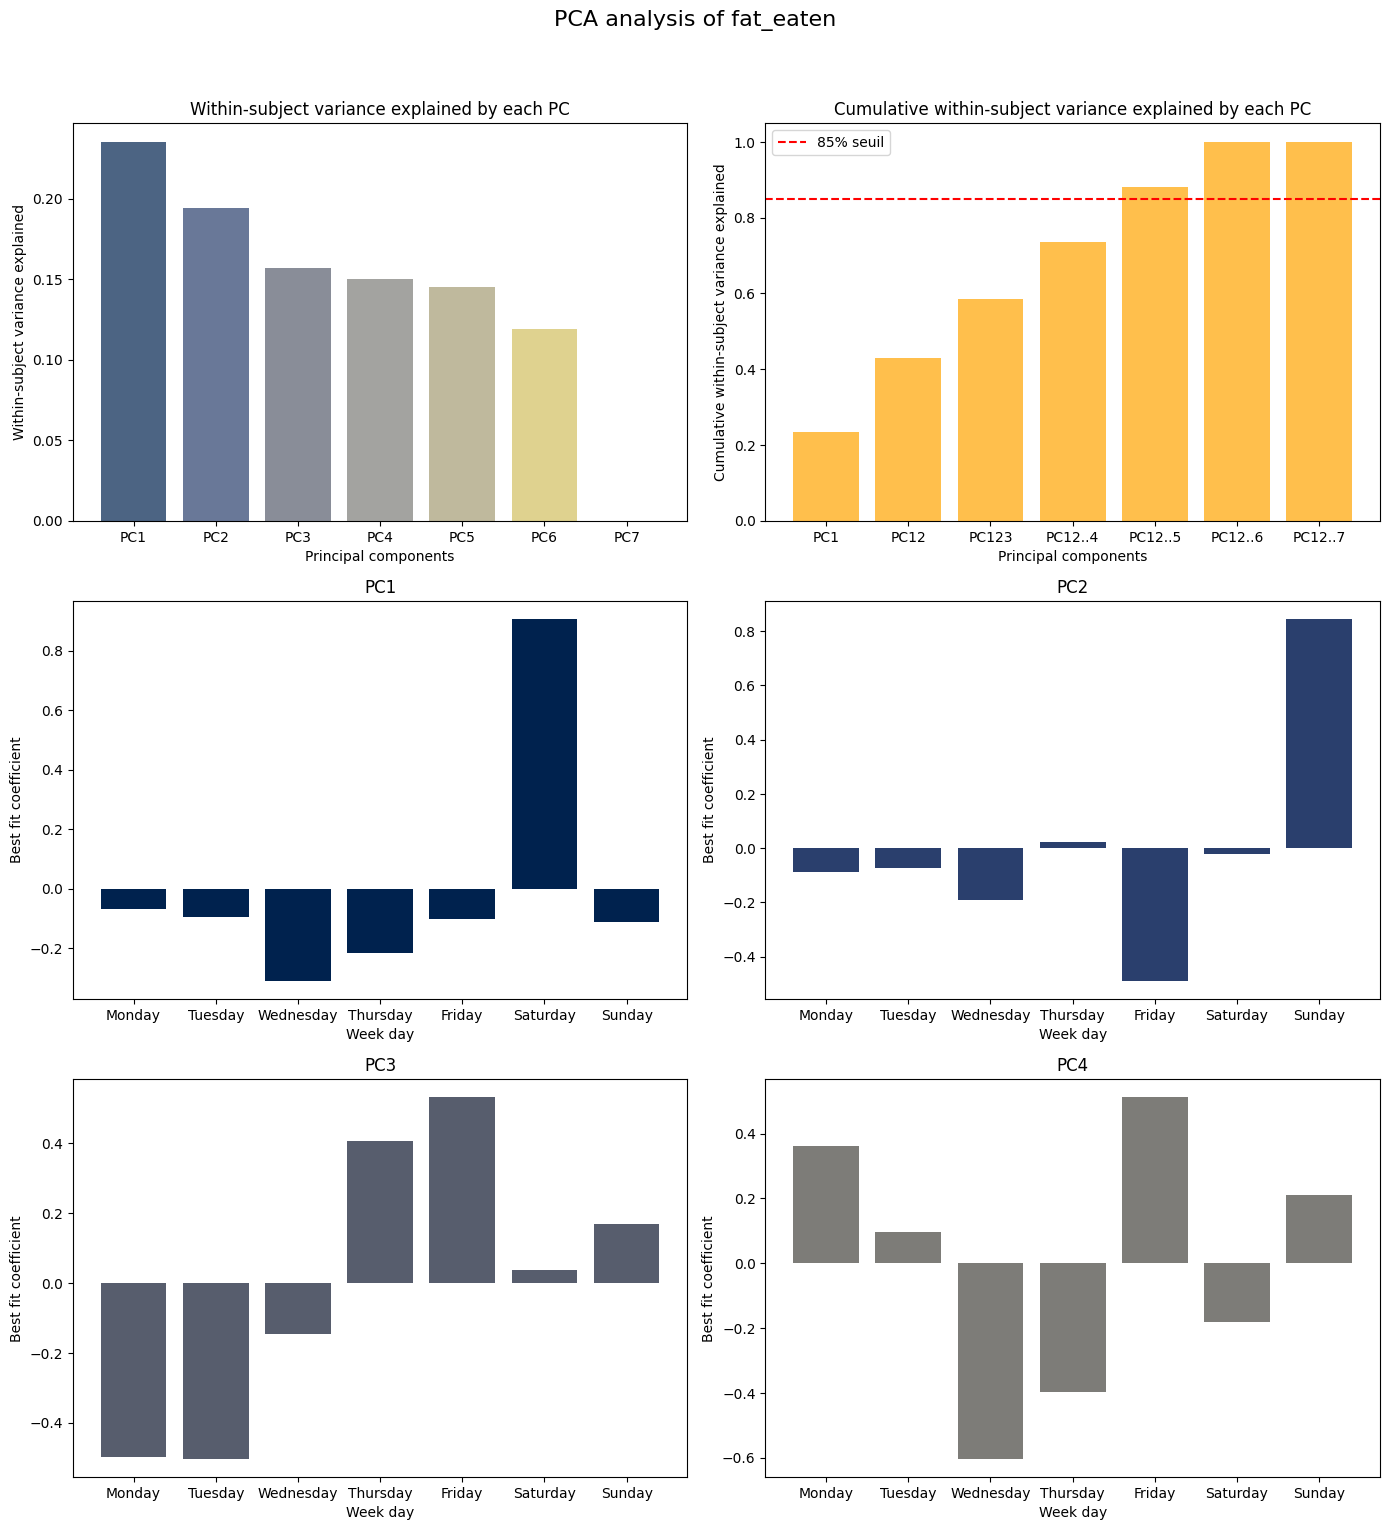

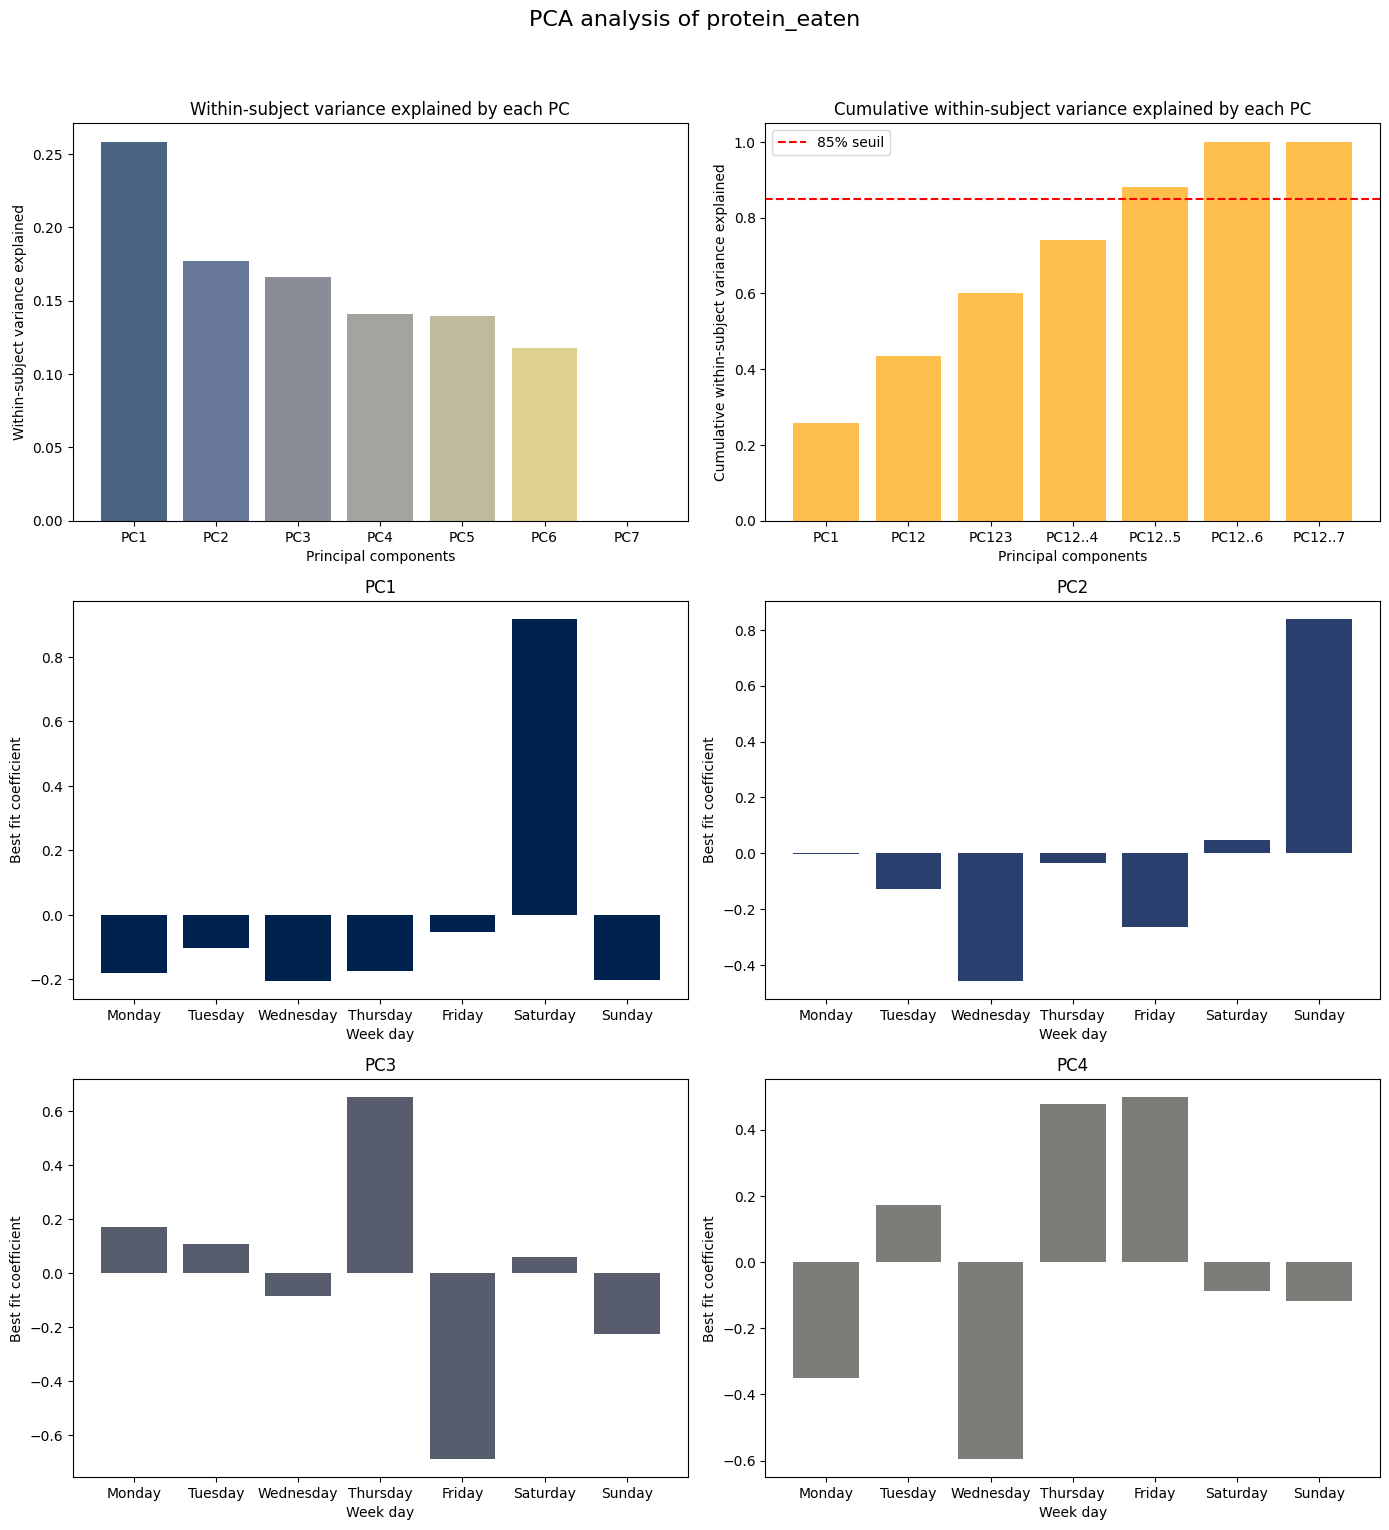

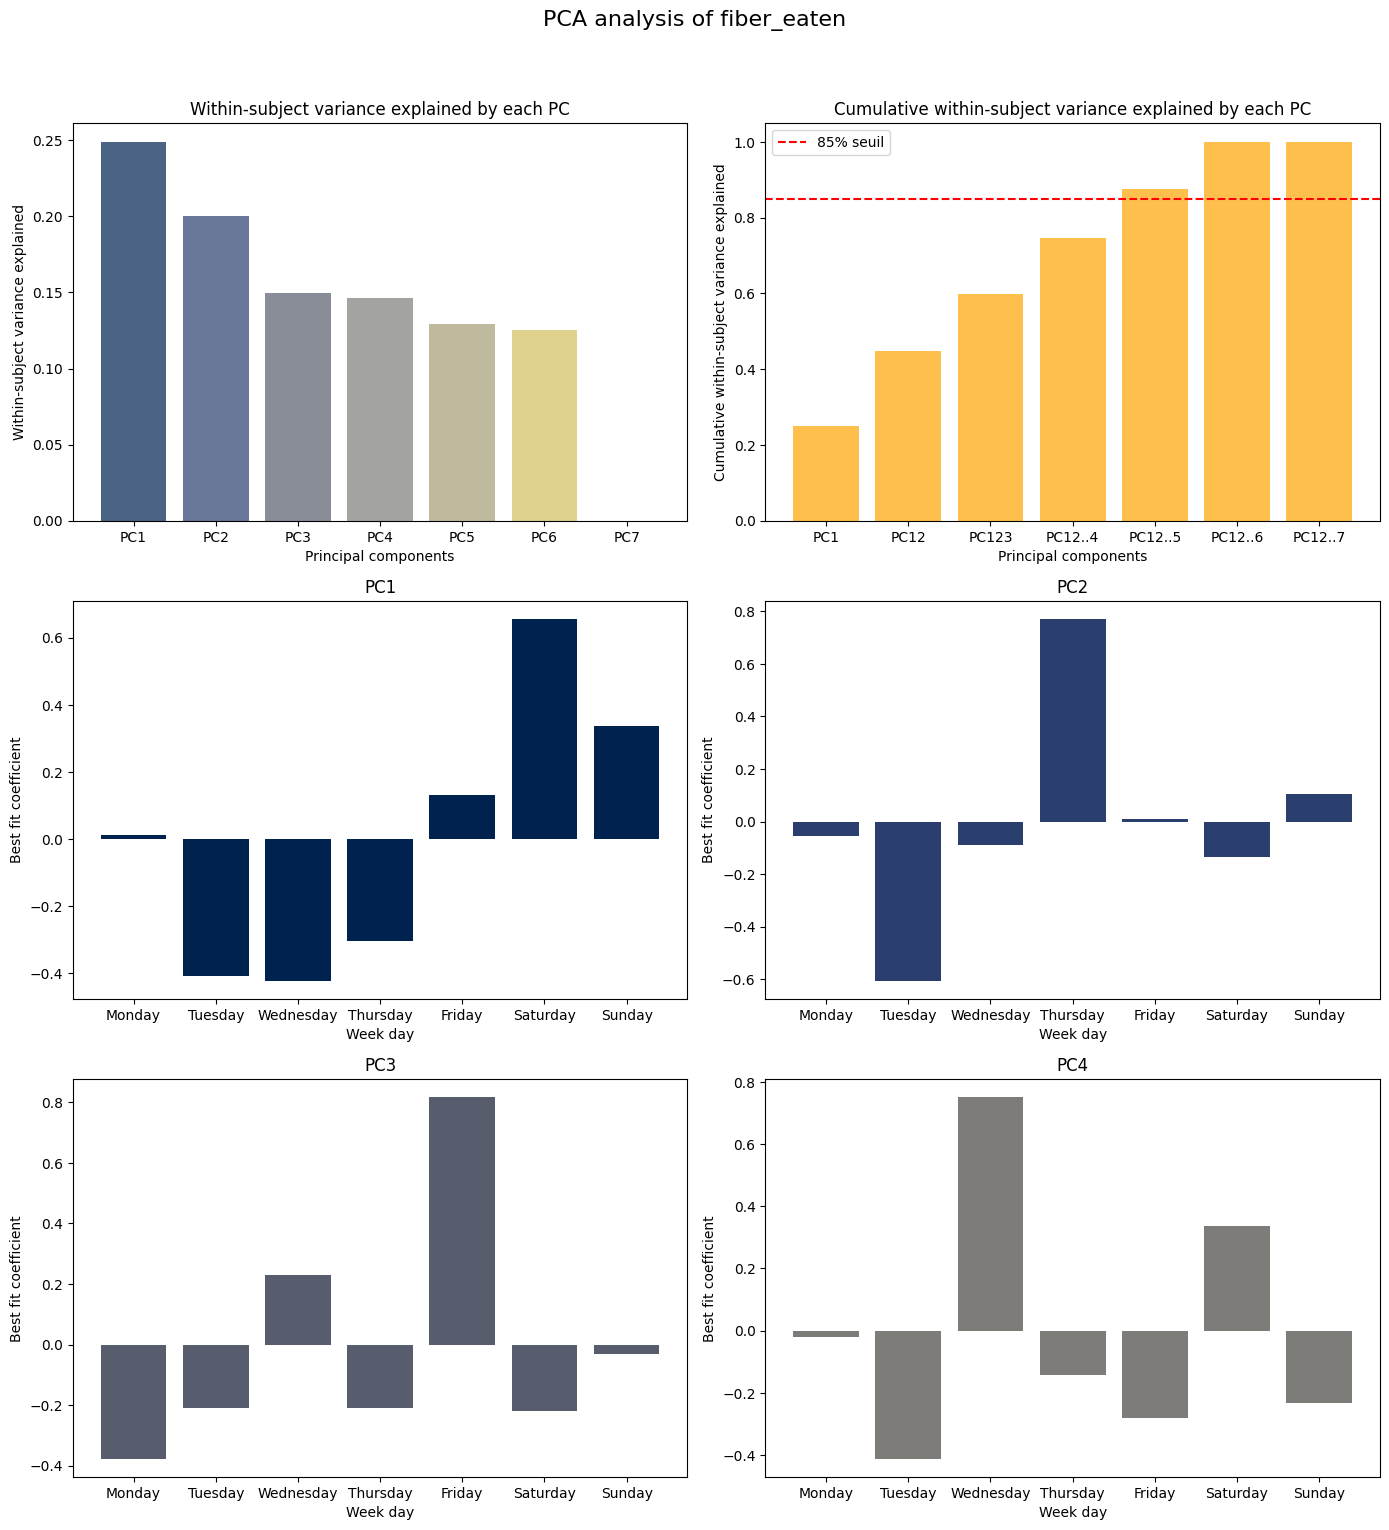

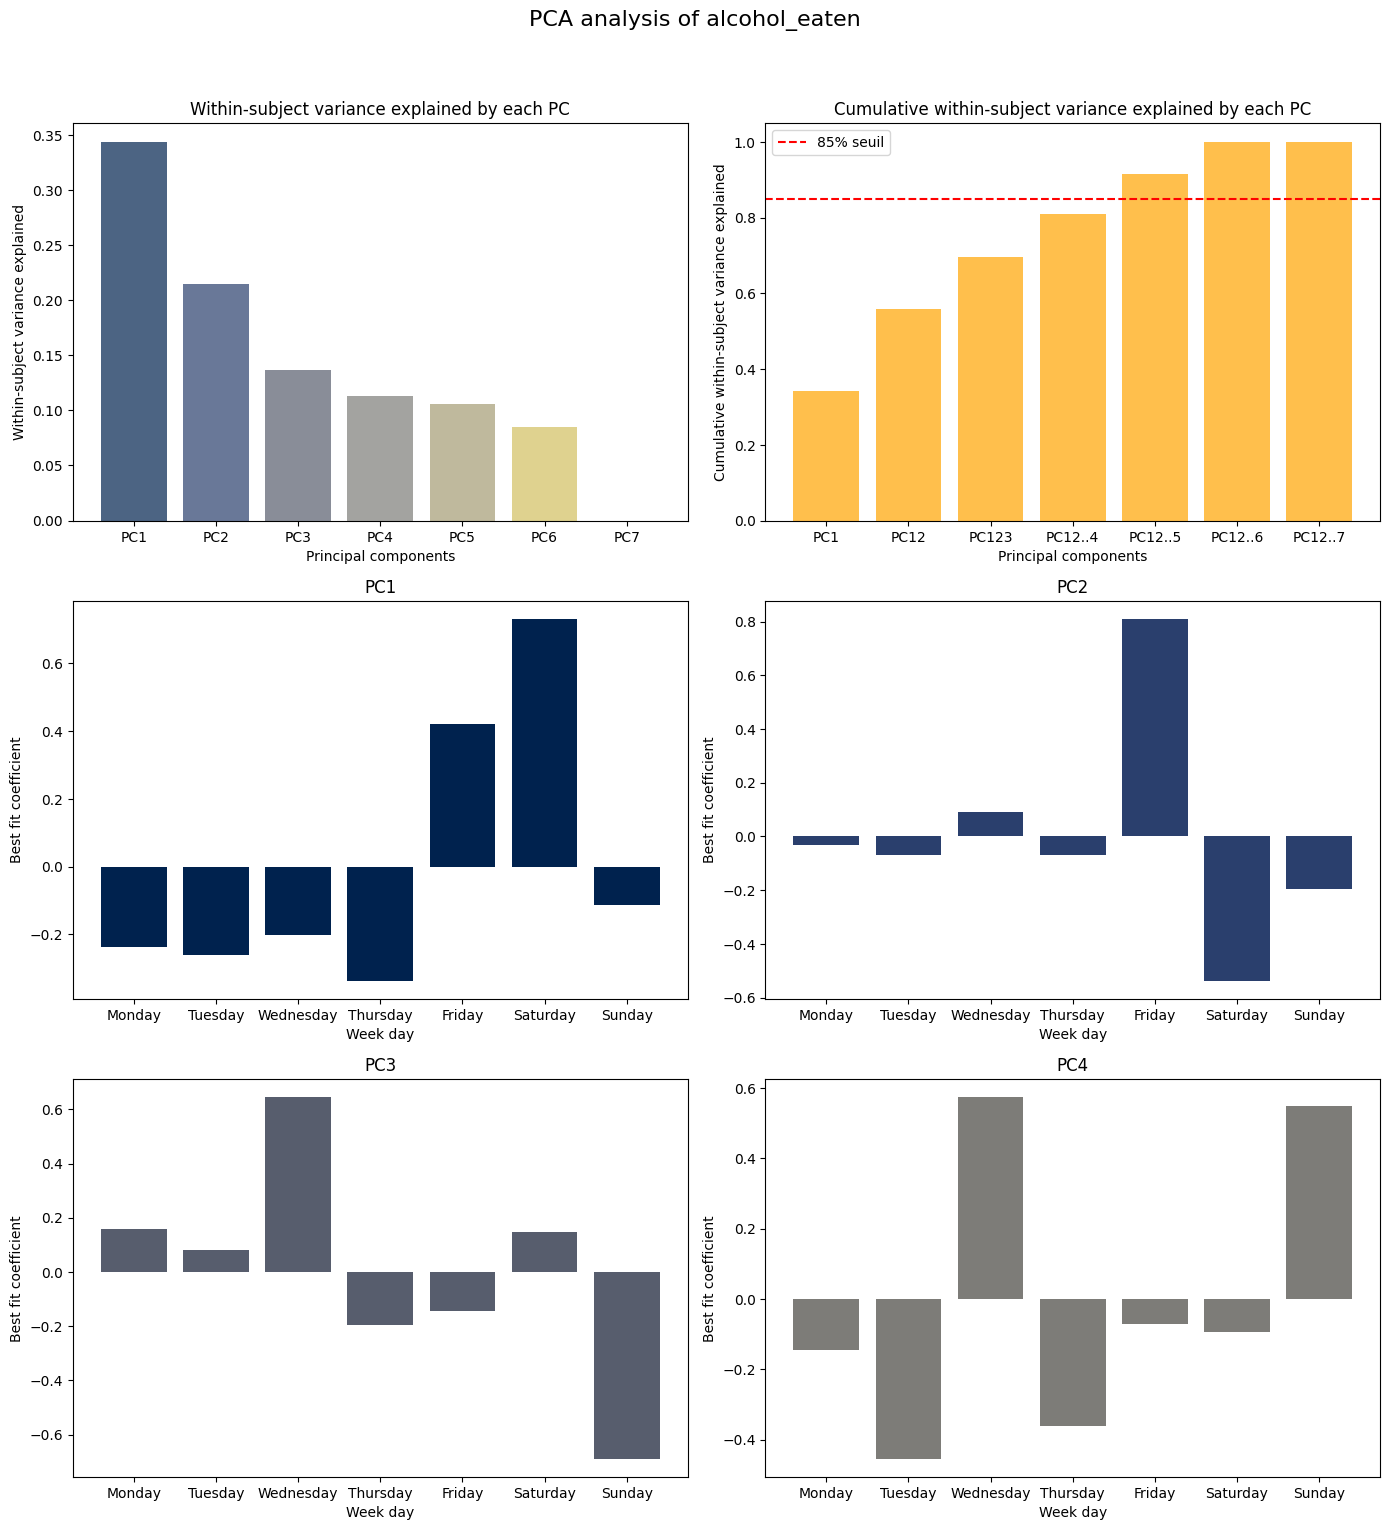

In [4]:
def plot_PCA_intra_subject(feature):
    feature_data = data.pivot_table(index='subject_key', columns='week_day', values=feature)
    feature_data_centered = feature_data.sub(feature_data.mean(axis=1), axis=0)
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    feature_data_centered = feature_data_centered[order]
    pca_intra = PCA()
    protein_data_centered_pca = pca_intra.fit_transform(feature_data_centered.to_numpy())
    explained_variance_intra = pca_intra.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_intra)

    loadings = pca_intra.components_

    l = [f"PC{i+1}" for i in range(len(explained_variance_intra))]
    l2 =['PC1', 'PC12', 'PC123', 'PC12..4', 'PC12..5', 'PC12..6', 'PC12..7']


    colors = cm.cividis(np.linspace(0, 1, len(explained_variance_intra)))
    plt.figure(figsize=(14, 20))
    plt.subplot(4, 2, 1)
    plt.bar(l, explained_variance_intra, alpha=0.7, color=colors[:len(explained_variance_intra)])
    plt.xlabel('Principal components')
    plt.ylabel('Within-subject variance explained')
    plt.title('Within-subject variance explained by each PC')

    plt.subplot(4, 2, 2)
    plt.bar(l2, cumulative_variance, alpha=0.7, color = "orange")
    plt.axhline(y=0.85, color='r', linestyle='--', label='85% seuil')
    plt.xlabel('Principal components')
    plt.ylabel('Cumulative within-subject variance explained')
    plt.title('Cumulative within-subject variance explained by each PC')
    plt.legend()

    plt.subplot(4, 2, 3)
    plt.bar(feature_data_centered.columns, loadings[0], color=colors[0])
    plt.xlabel('Week day')
    plt.ylabel('Best fit coefficient')
    plt.title('PC1')

    plt.subplot(4, 2, 4)
    plt.bar(feature_data_centered.columns, loadings[1], color=colors[1])
    plt.xlabel('Week day')
    plt.ylabel('Best fit coefficient')
    plt.title('PC2')

    plt.subplot(4, 2, 5)
    plt.bar(feature_data_centered.columns, loadings[2], color=colors[2])
    plt.xlabel('Week day')
    plt.ylabel('Best fit coefficient')
    plt.title('PC3')

    plt.subplot(4, 2, 6)
    plt.bar(feature_data_centered.columns, loadings[3], color=colors[3])
    plt.xlabel('Week day')
    plt.ylabel('Best fit coefficient')
    plt.title('PC4')
    plt.suptitle(f'PCA analysis of {feature}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()
    return 0

for f in macro:
    plot_PCA_intra_subject(f)

In [5]:

pc_list = []
for i in range(1, 8):
    pc_list.append(f"PC1{i}")
print(pc_list)

pc_list = []

for i in range(1, 8):
    pc_list.append(f"PC1{i}")

print(pc_list)



['PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
['PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']


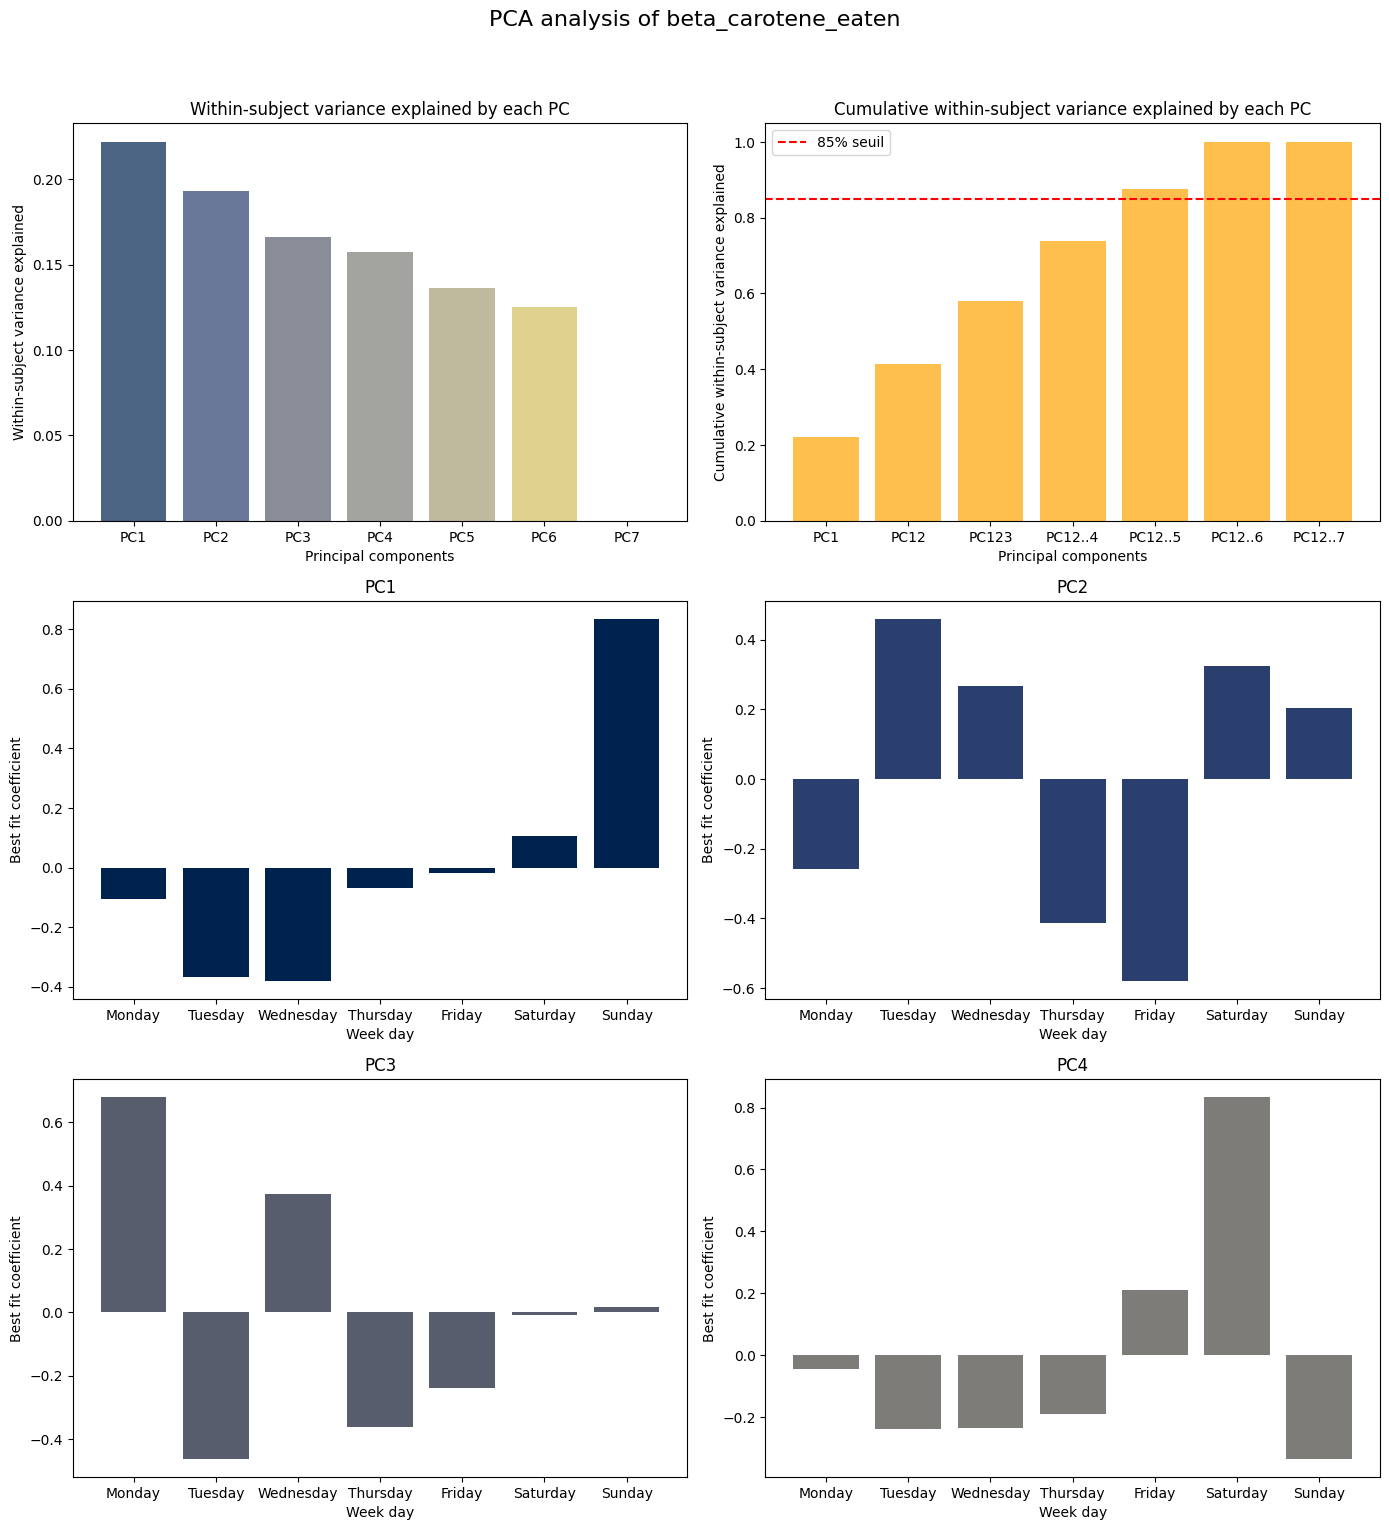

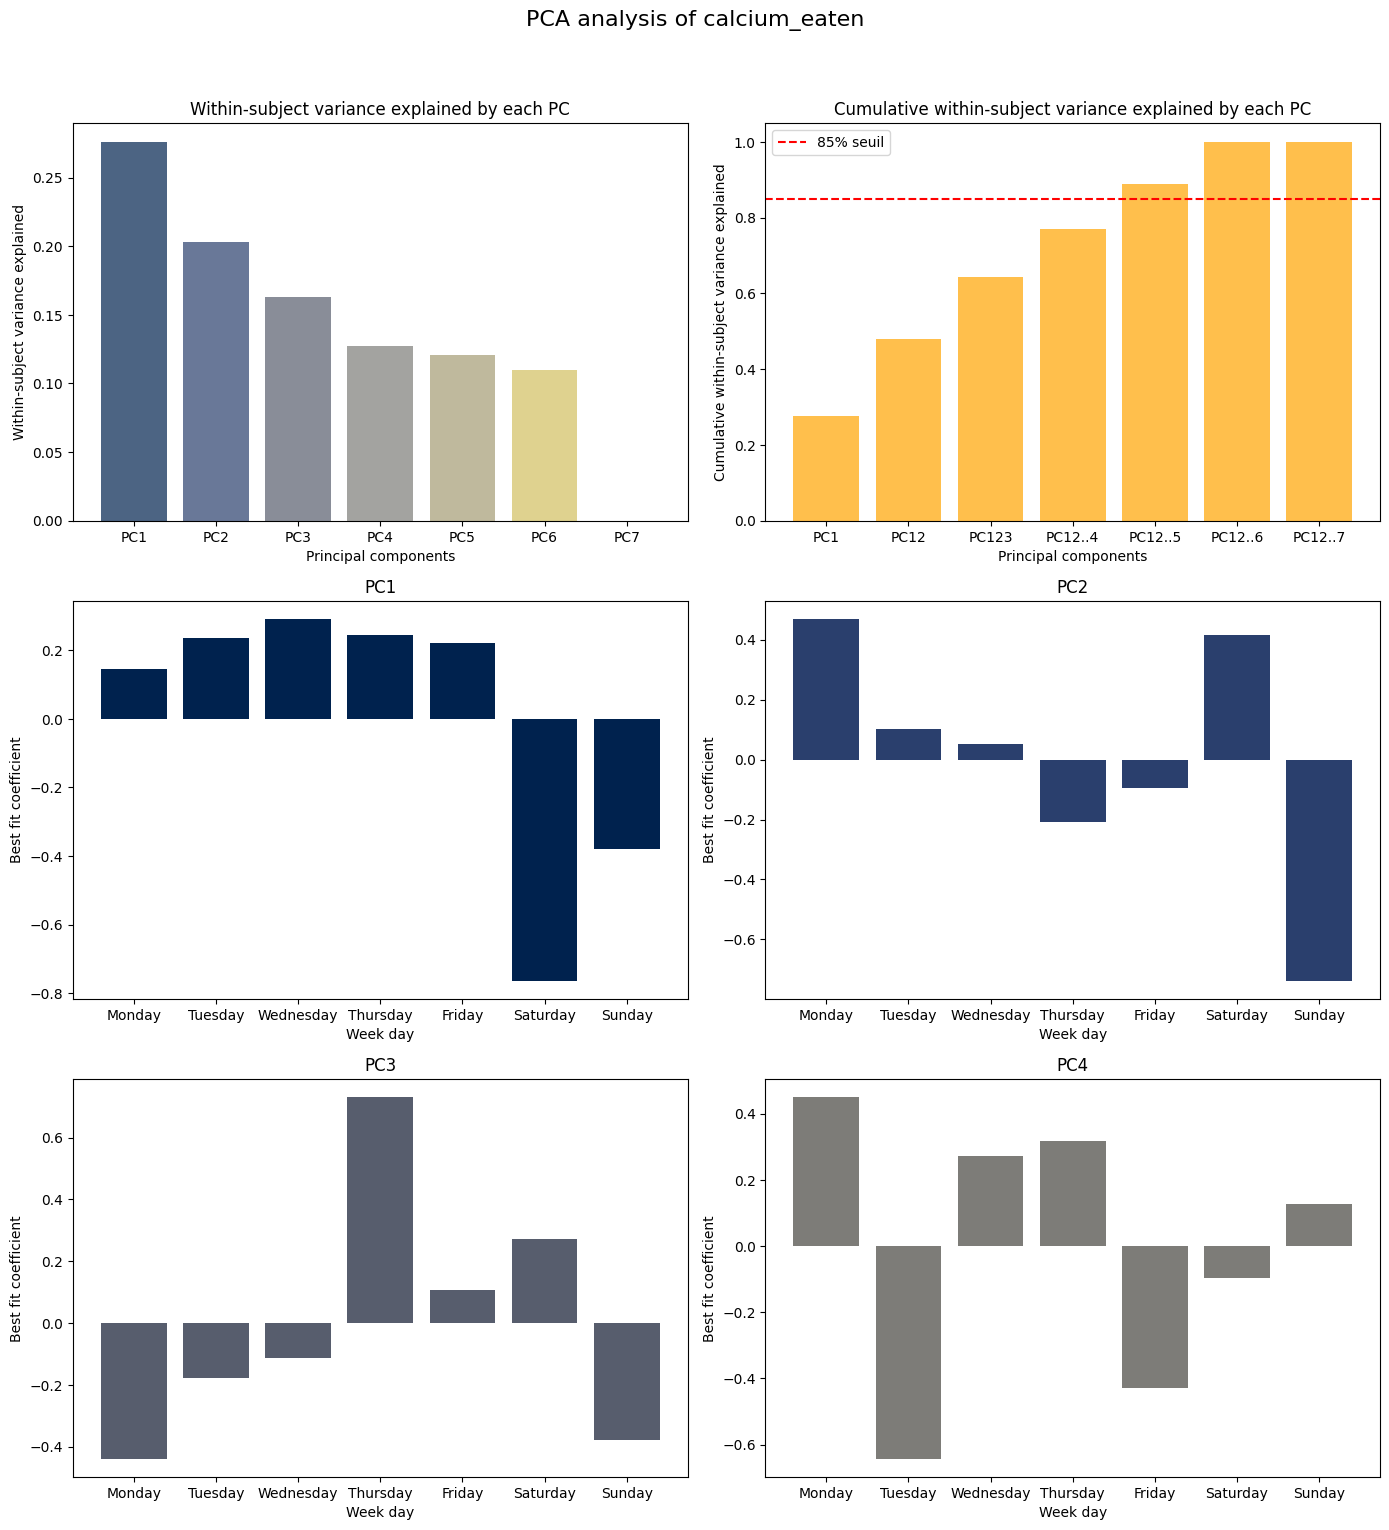

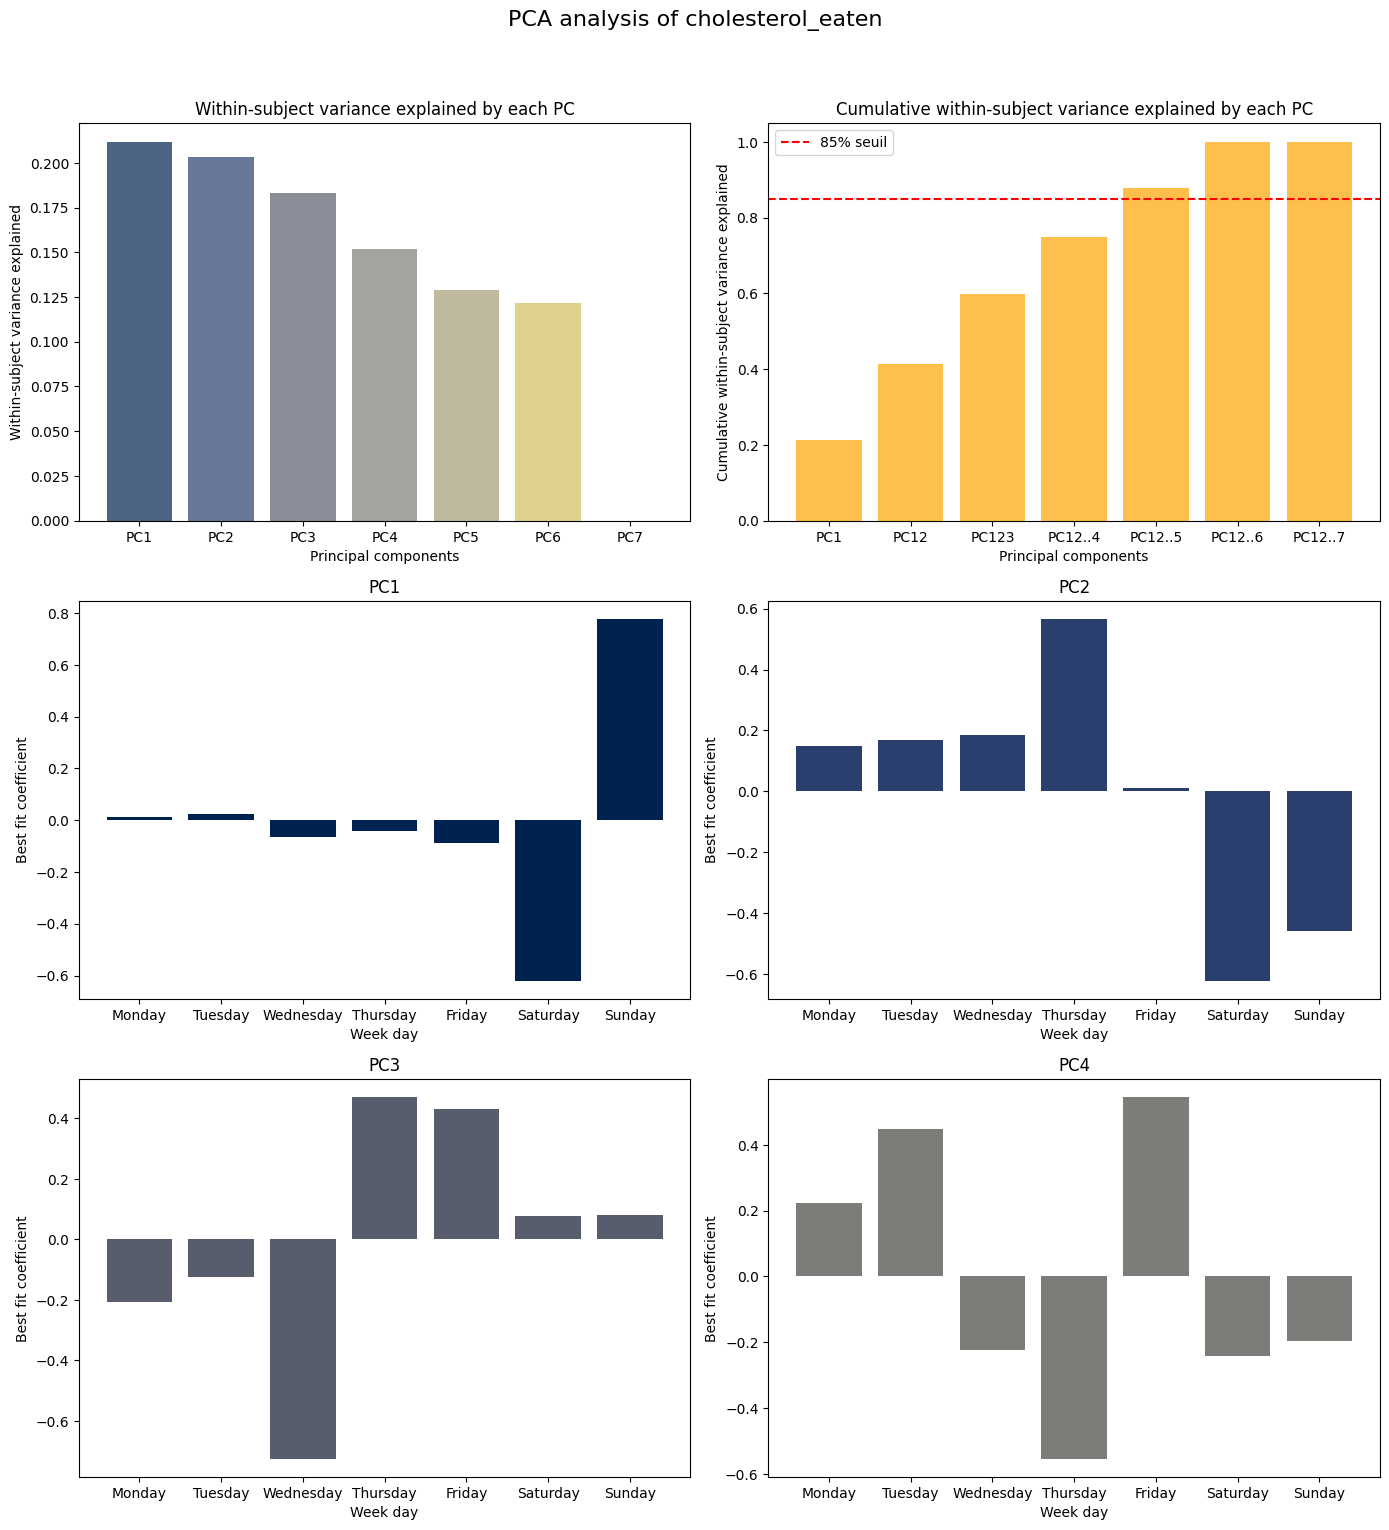

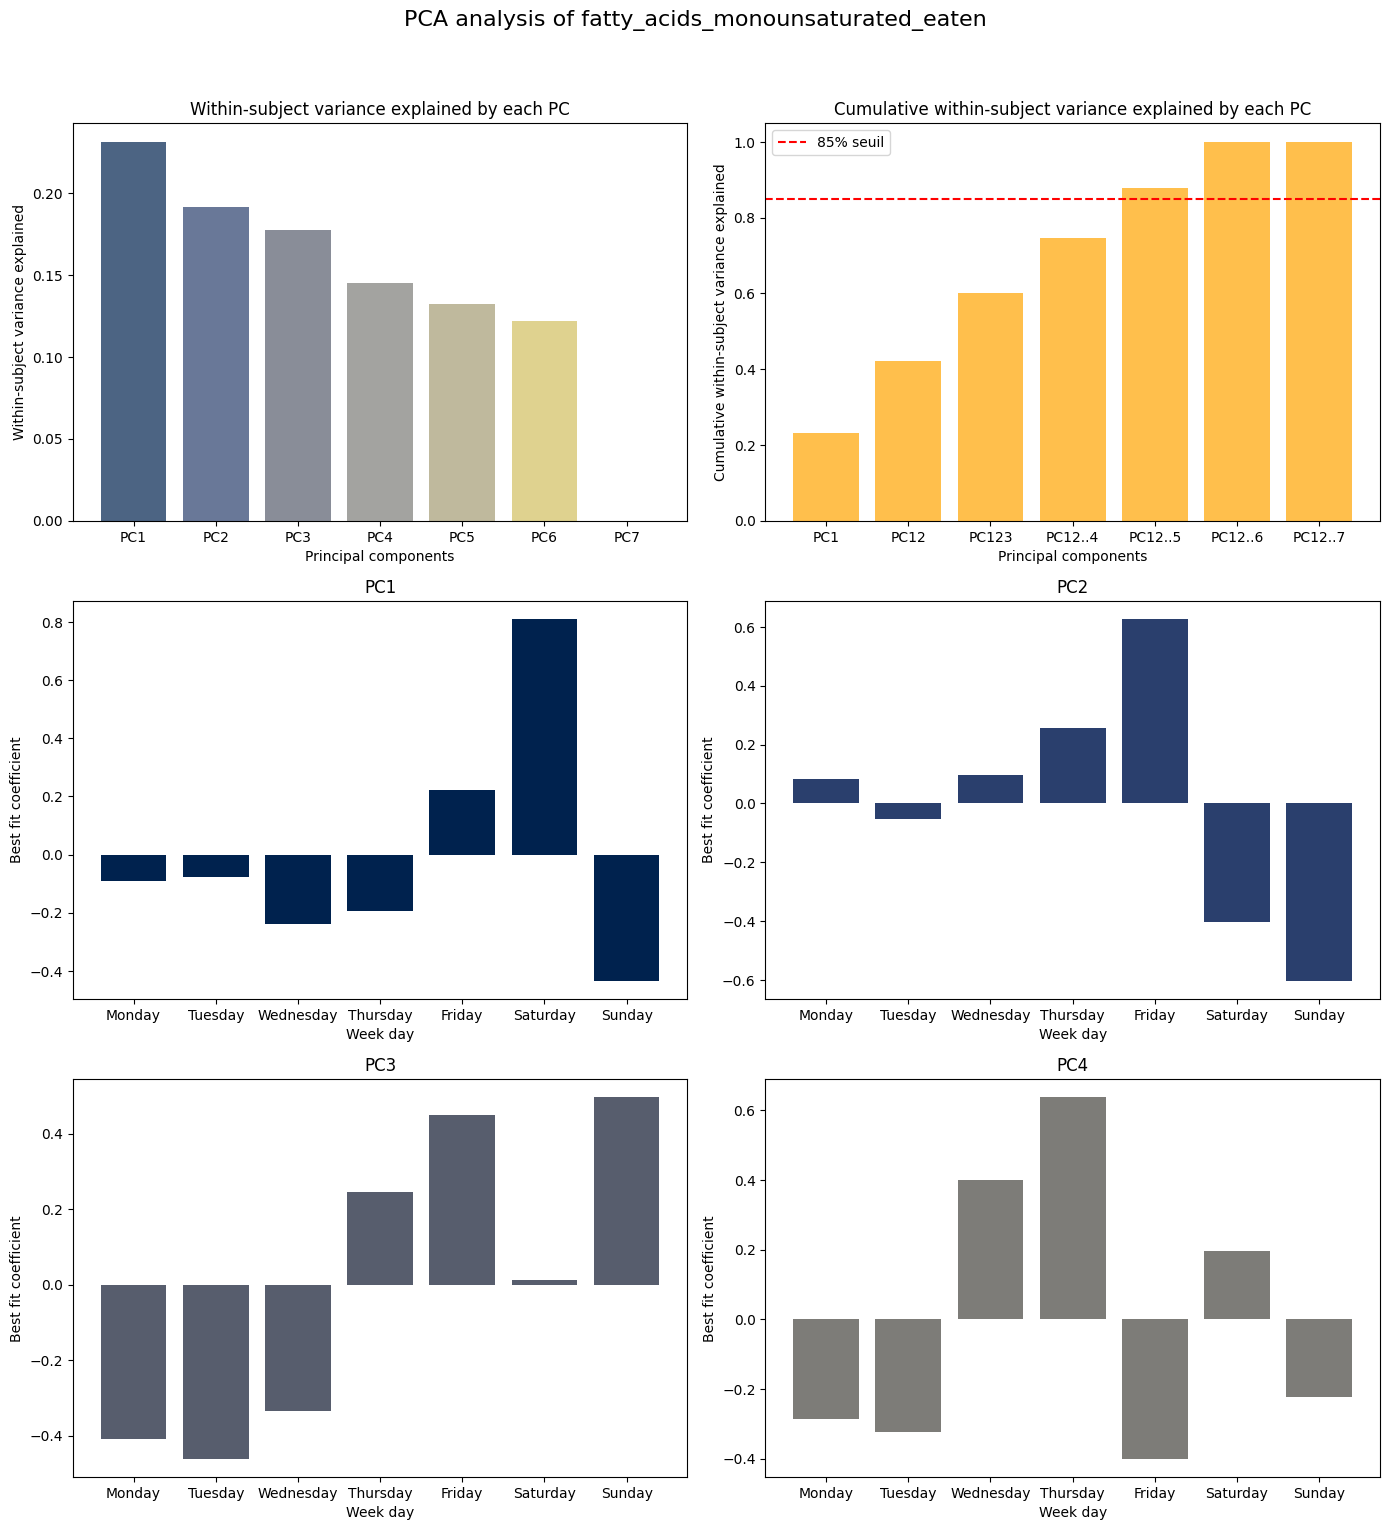

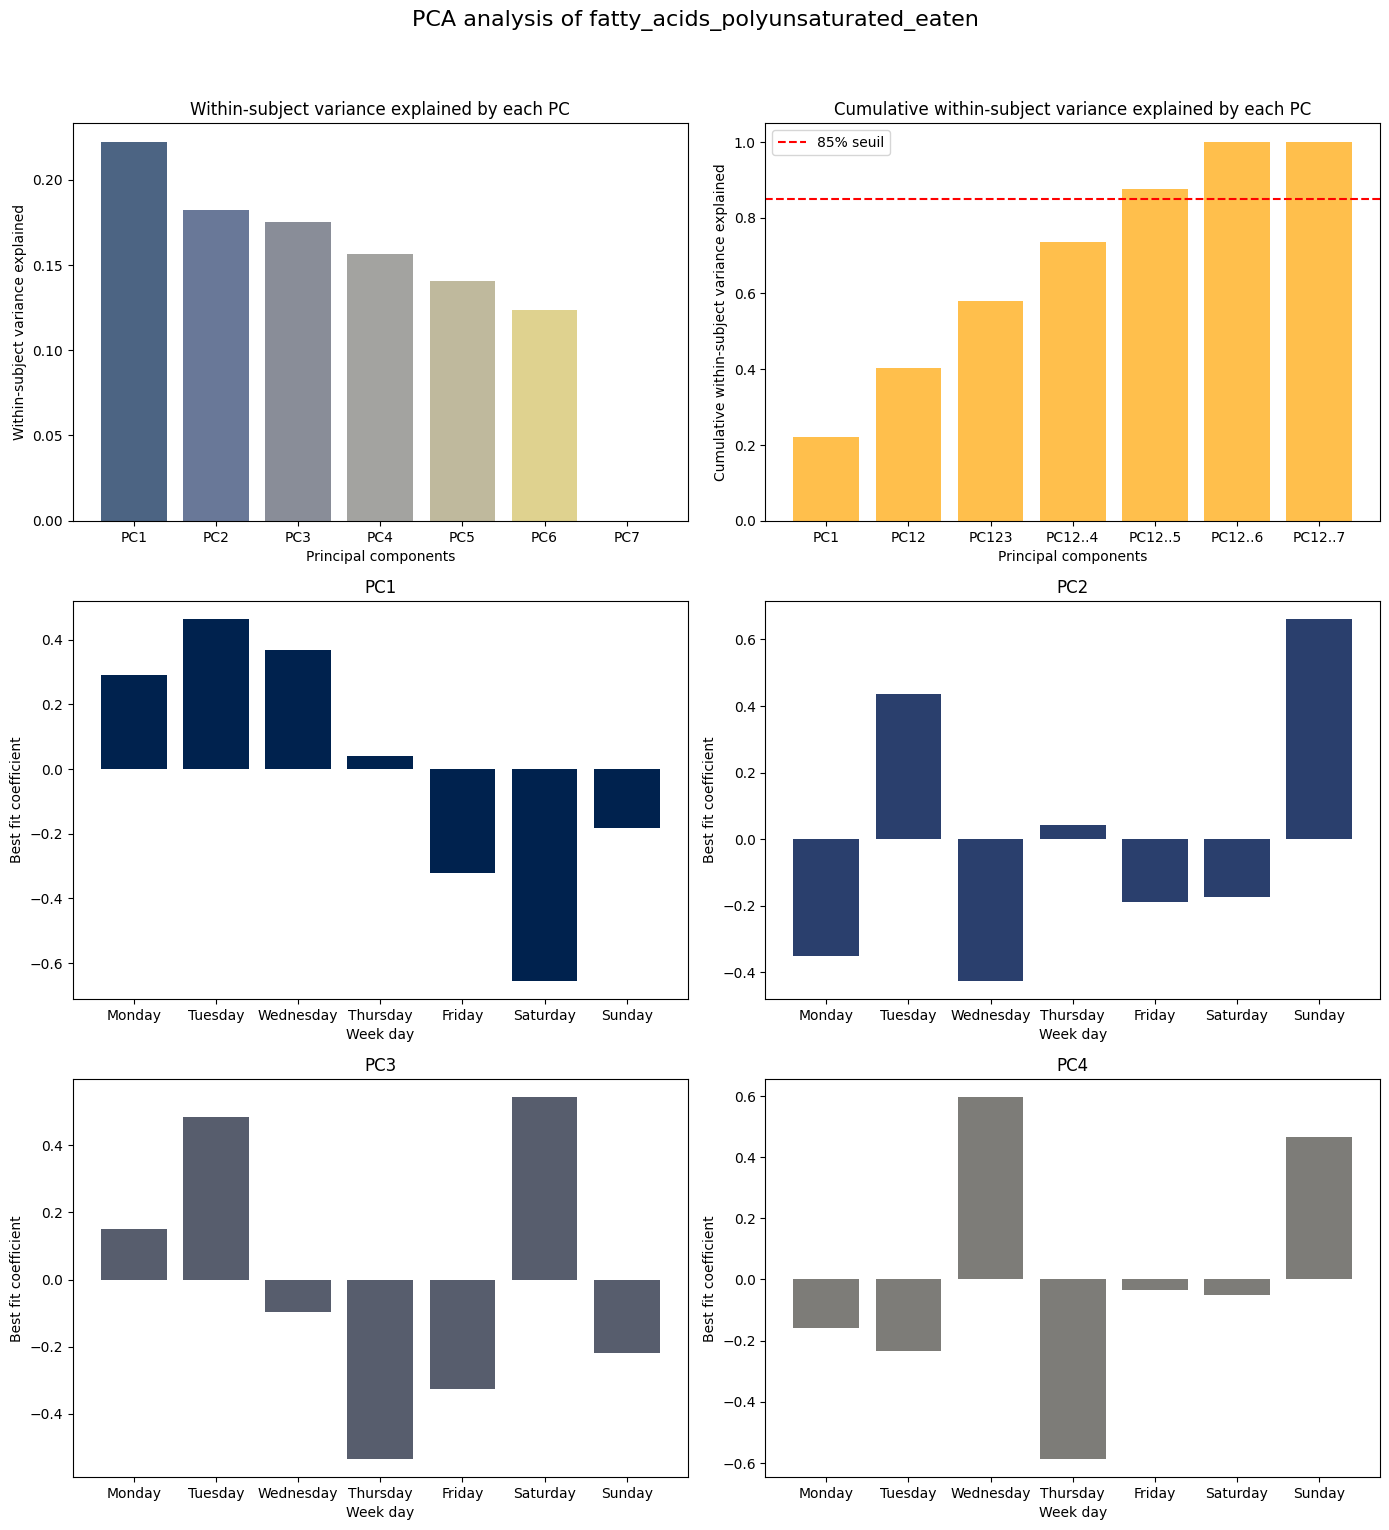

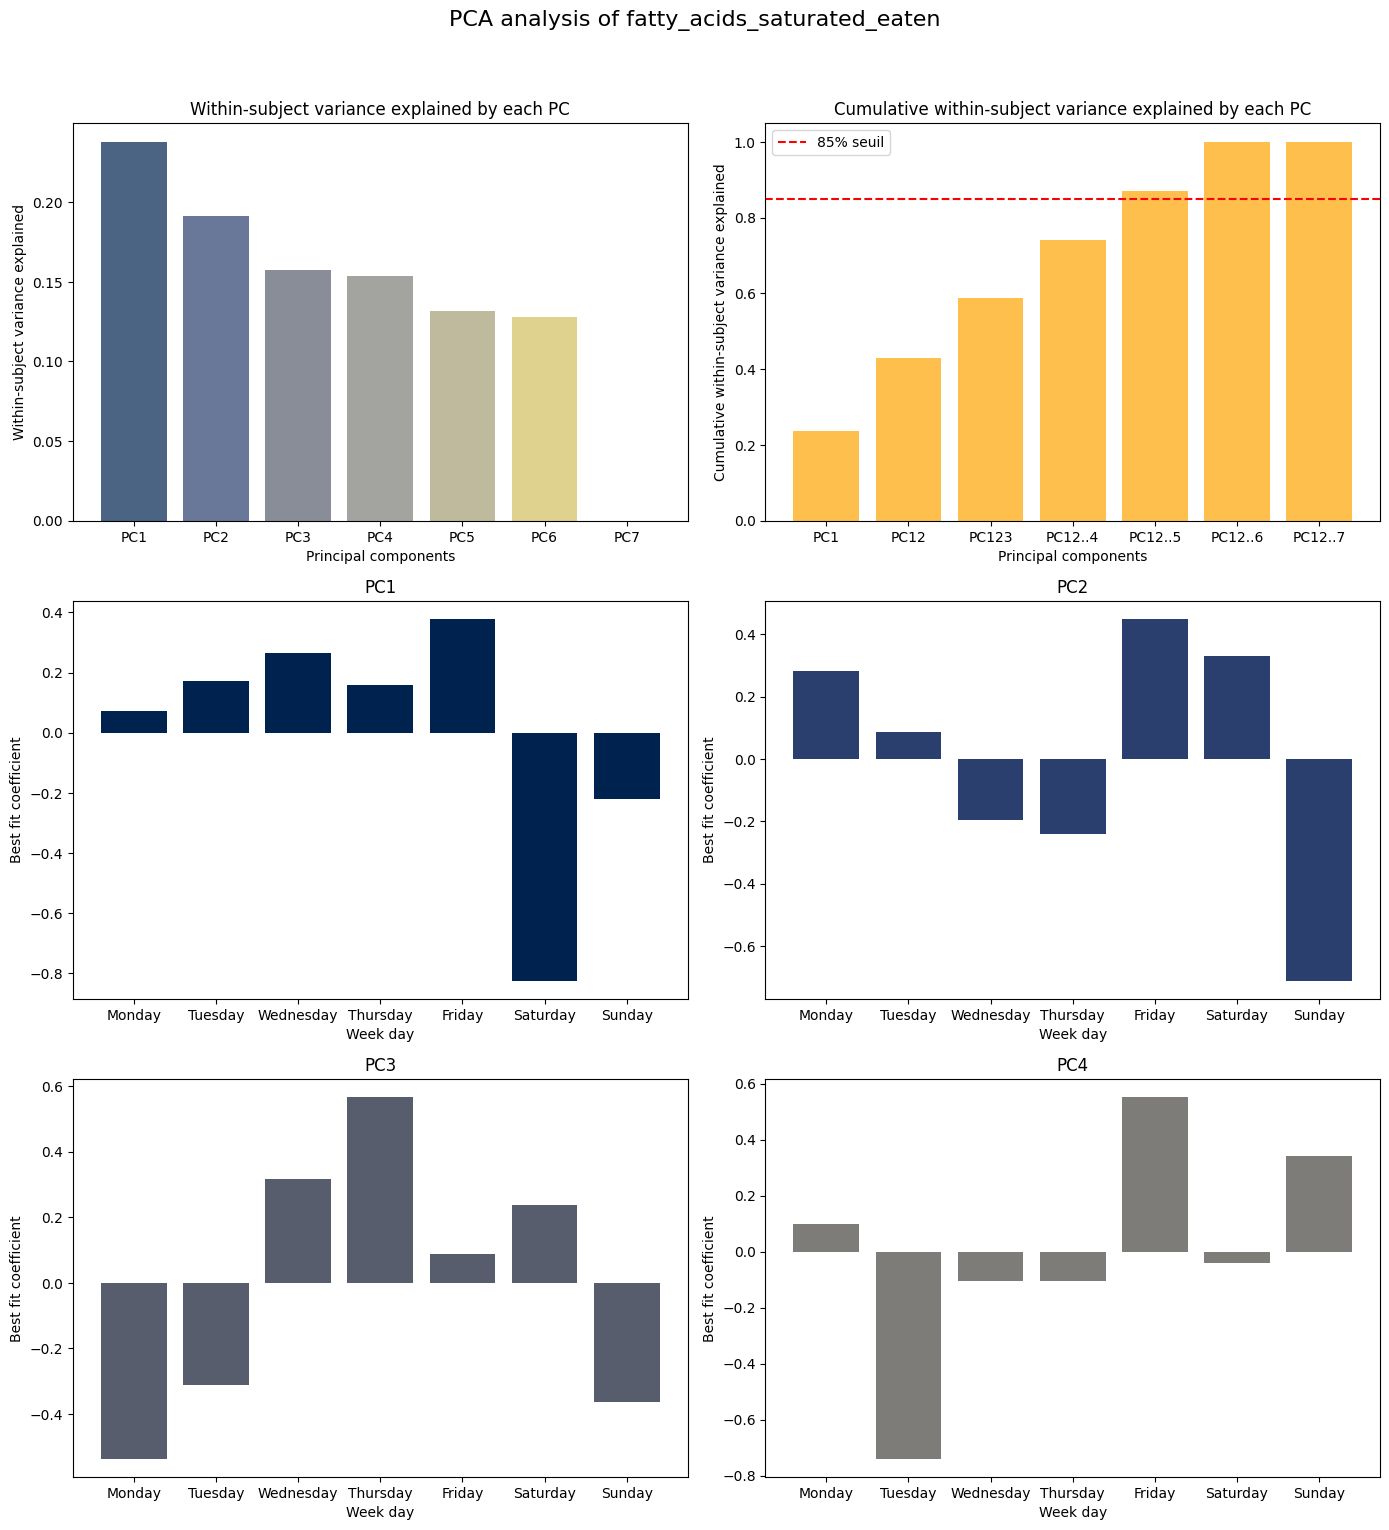

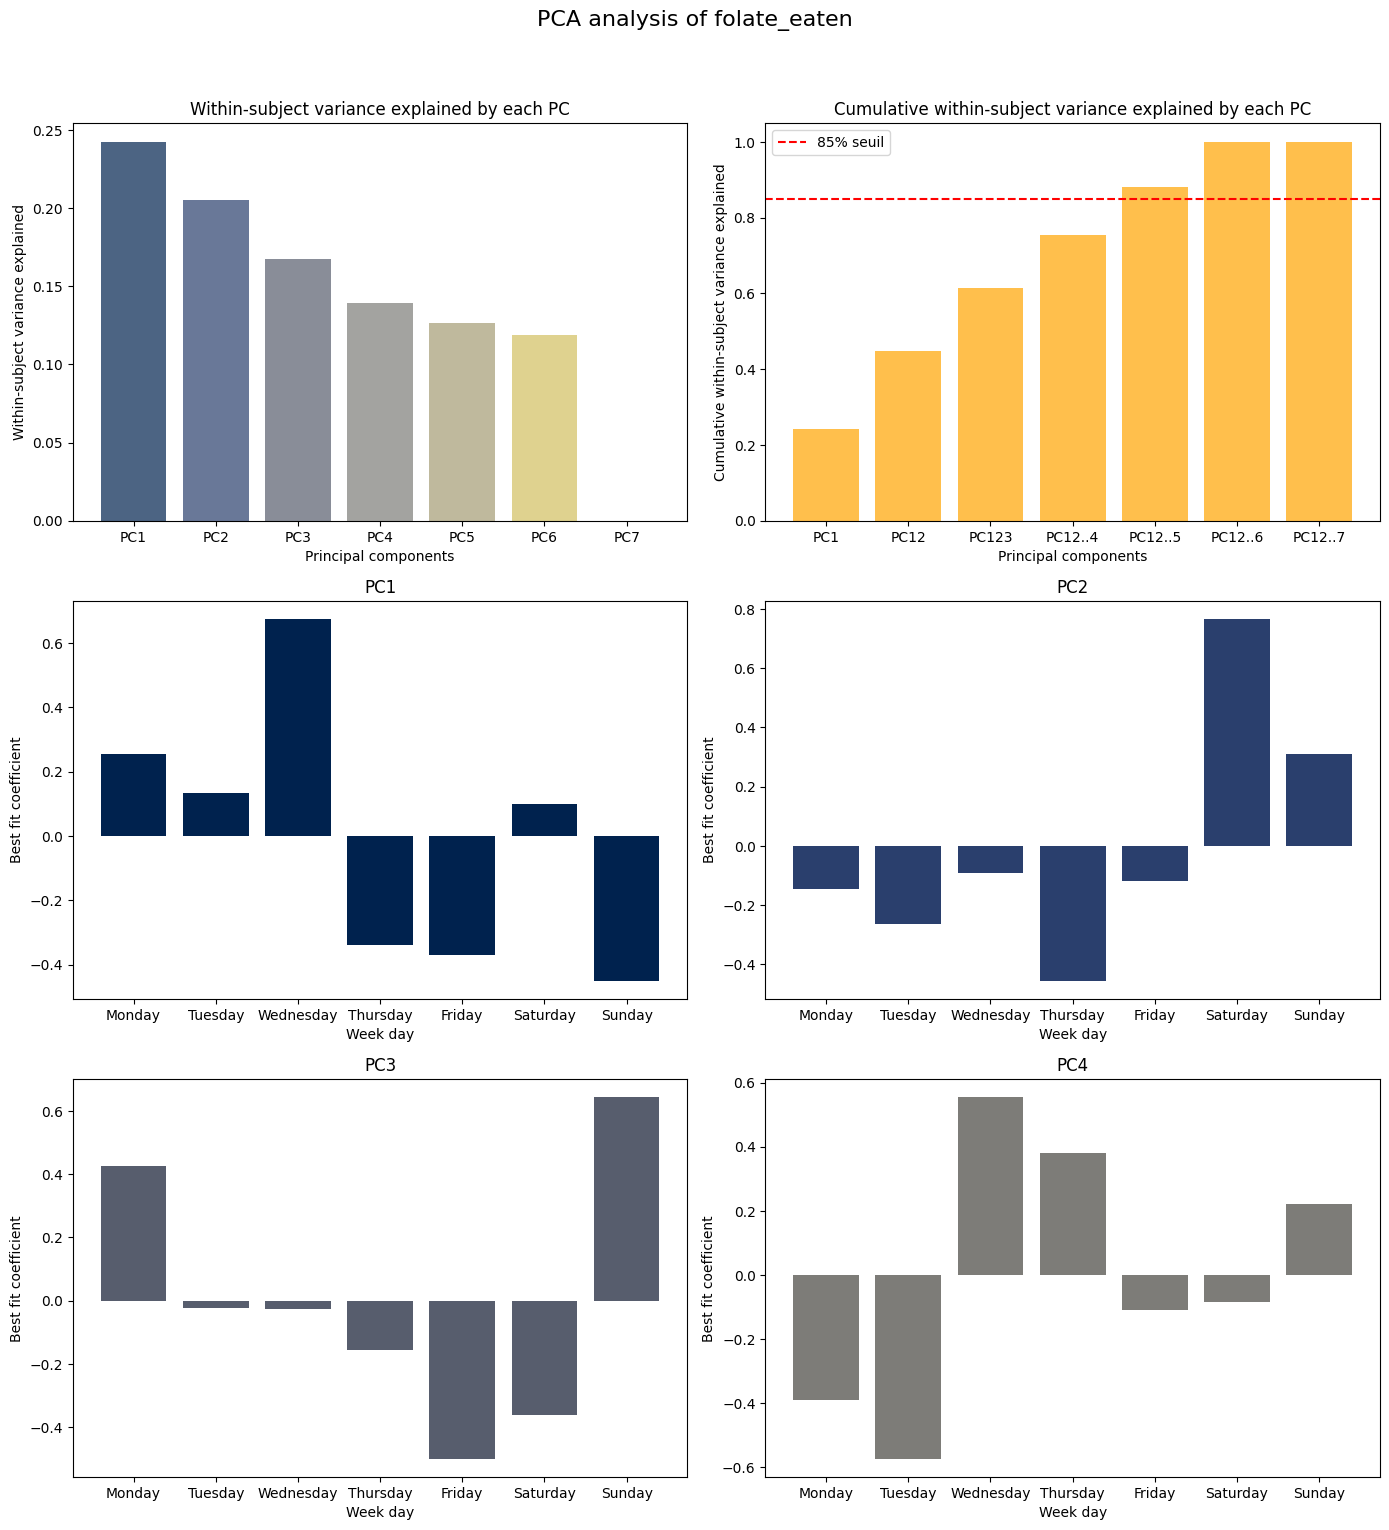

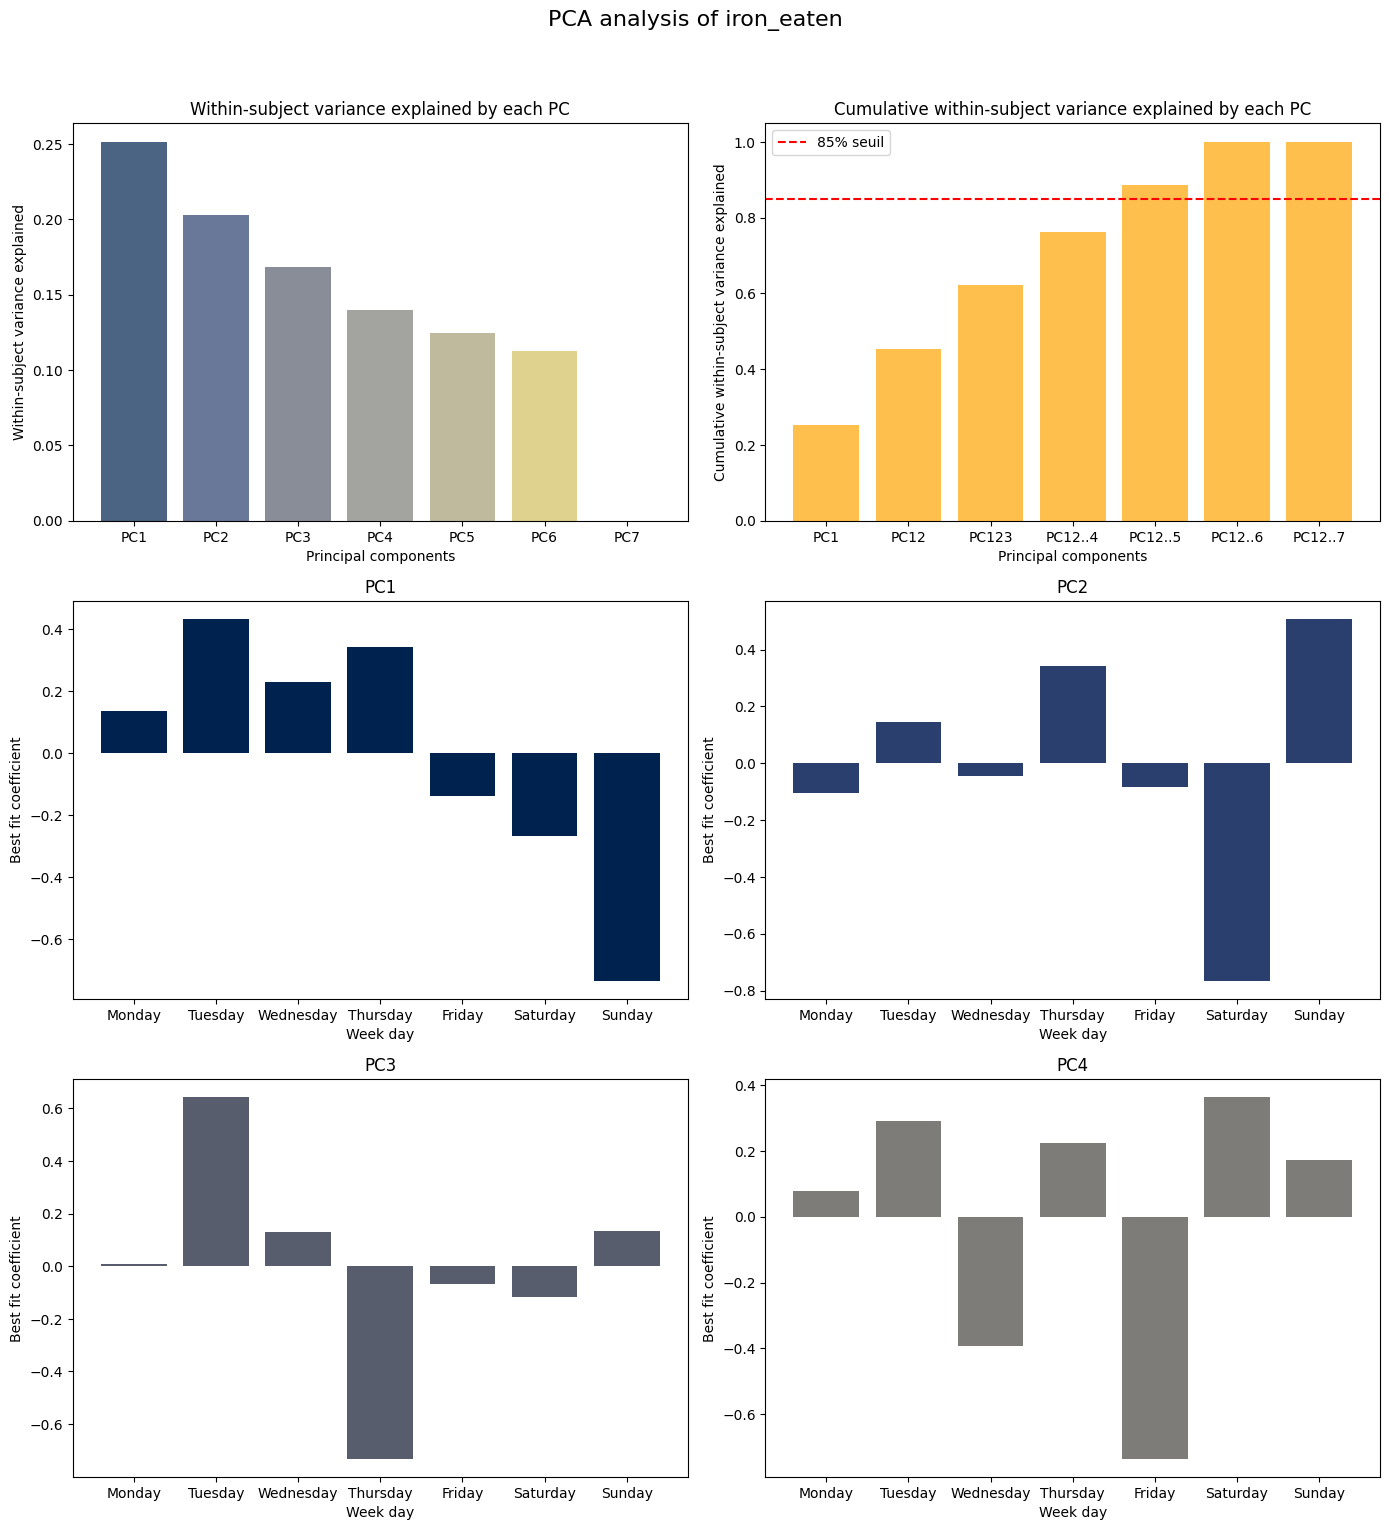

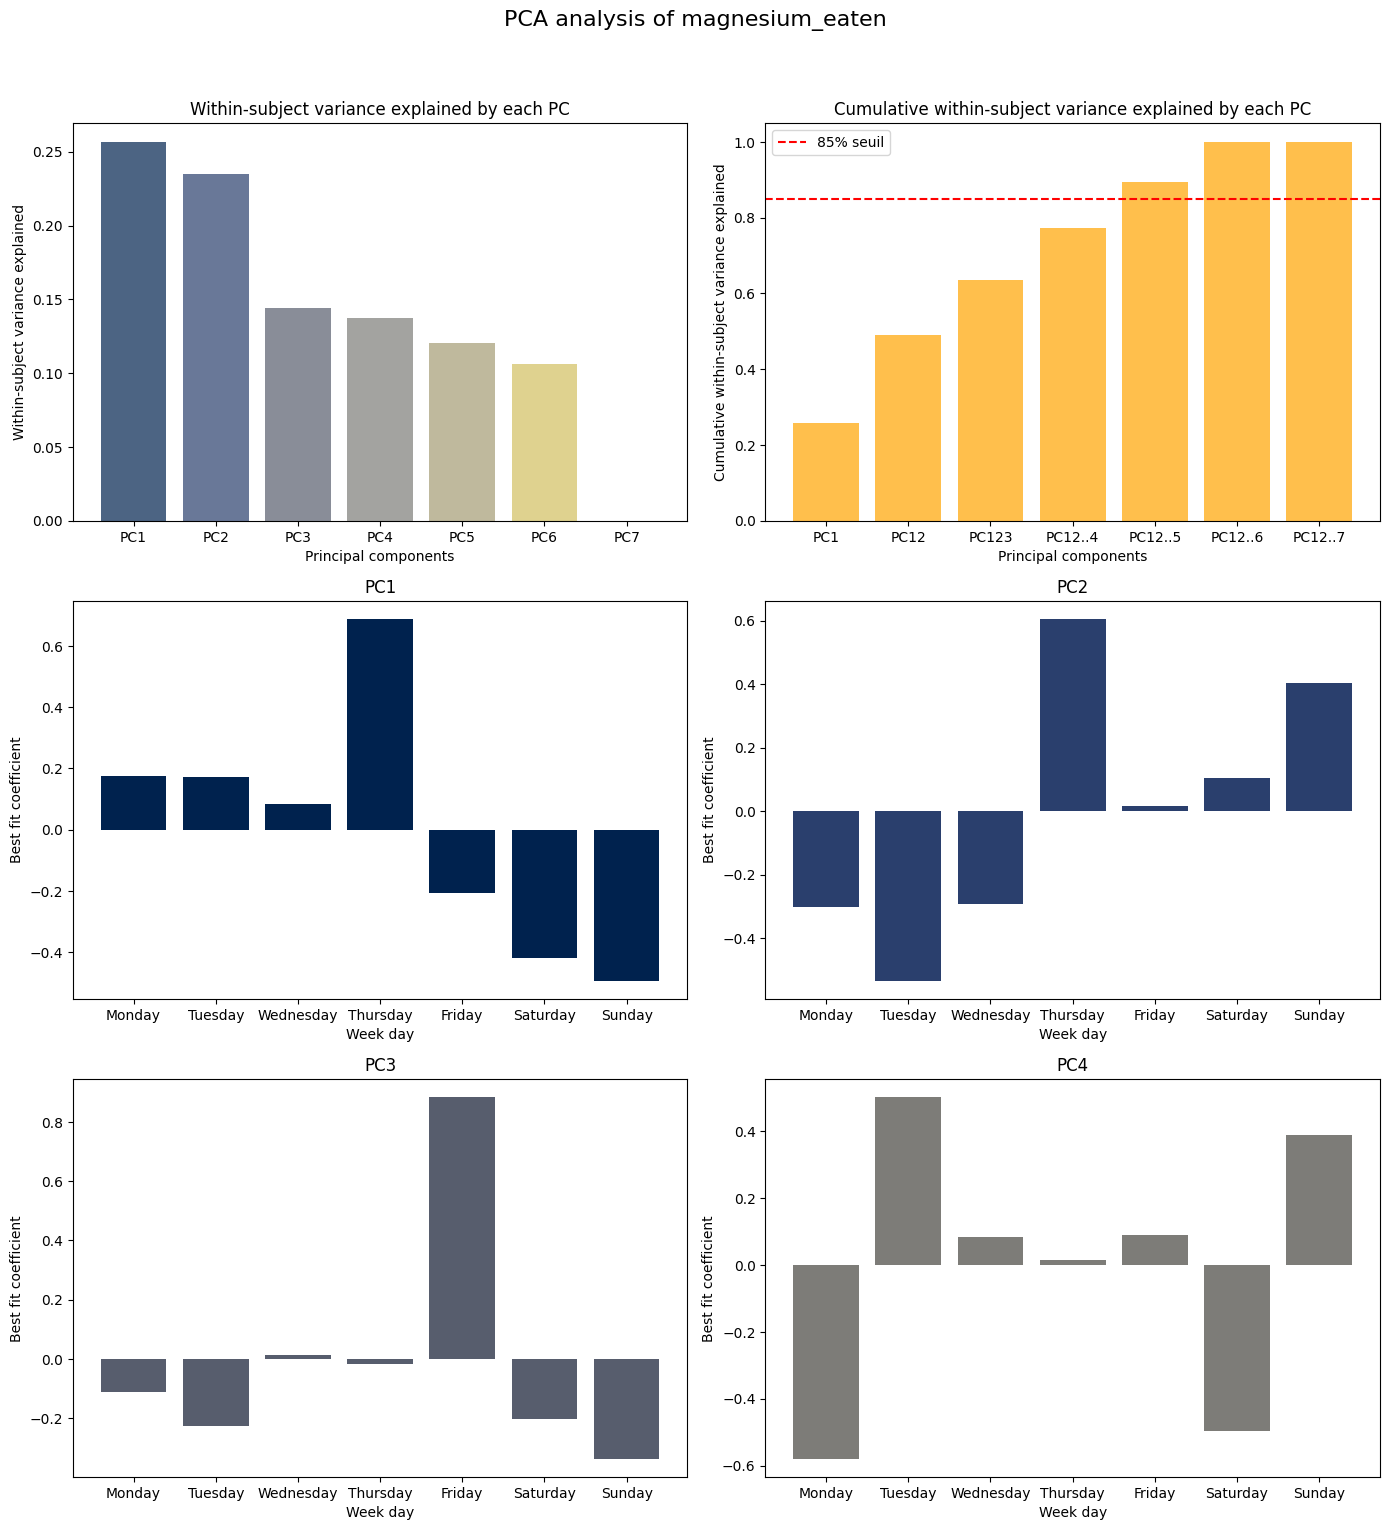

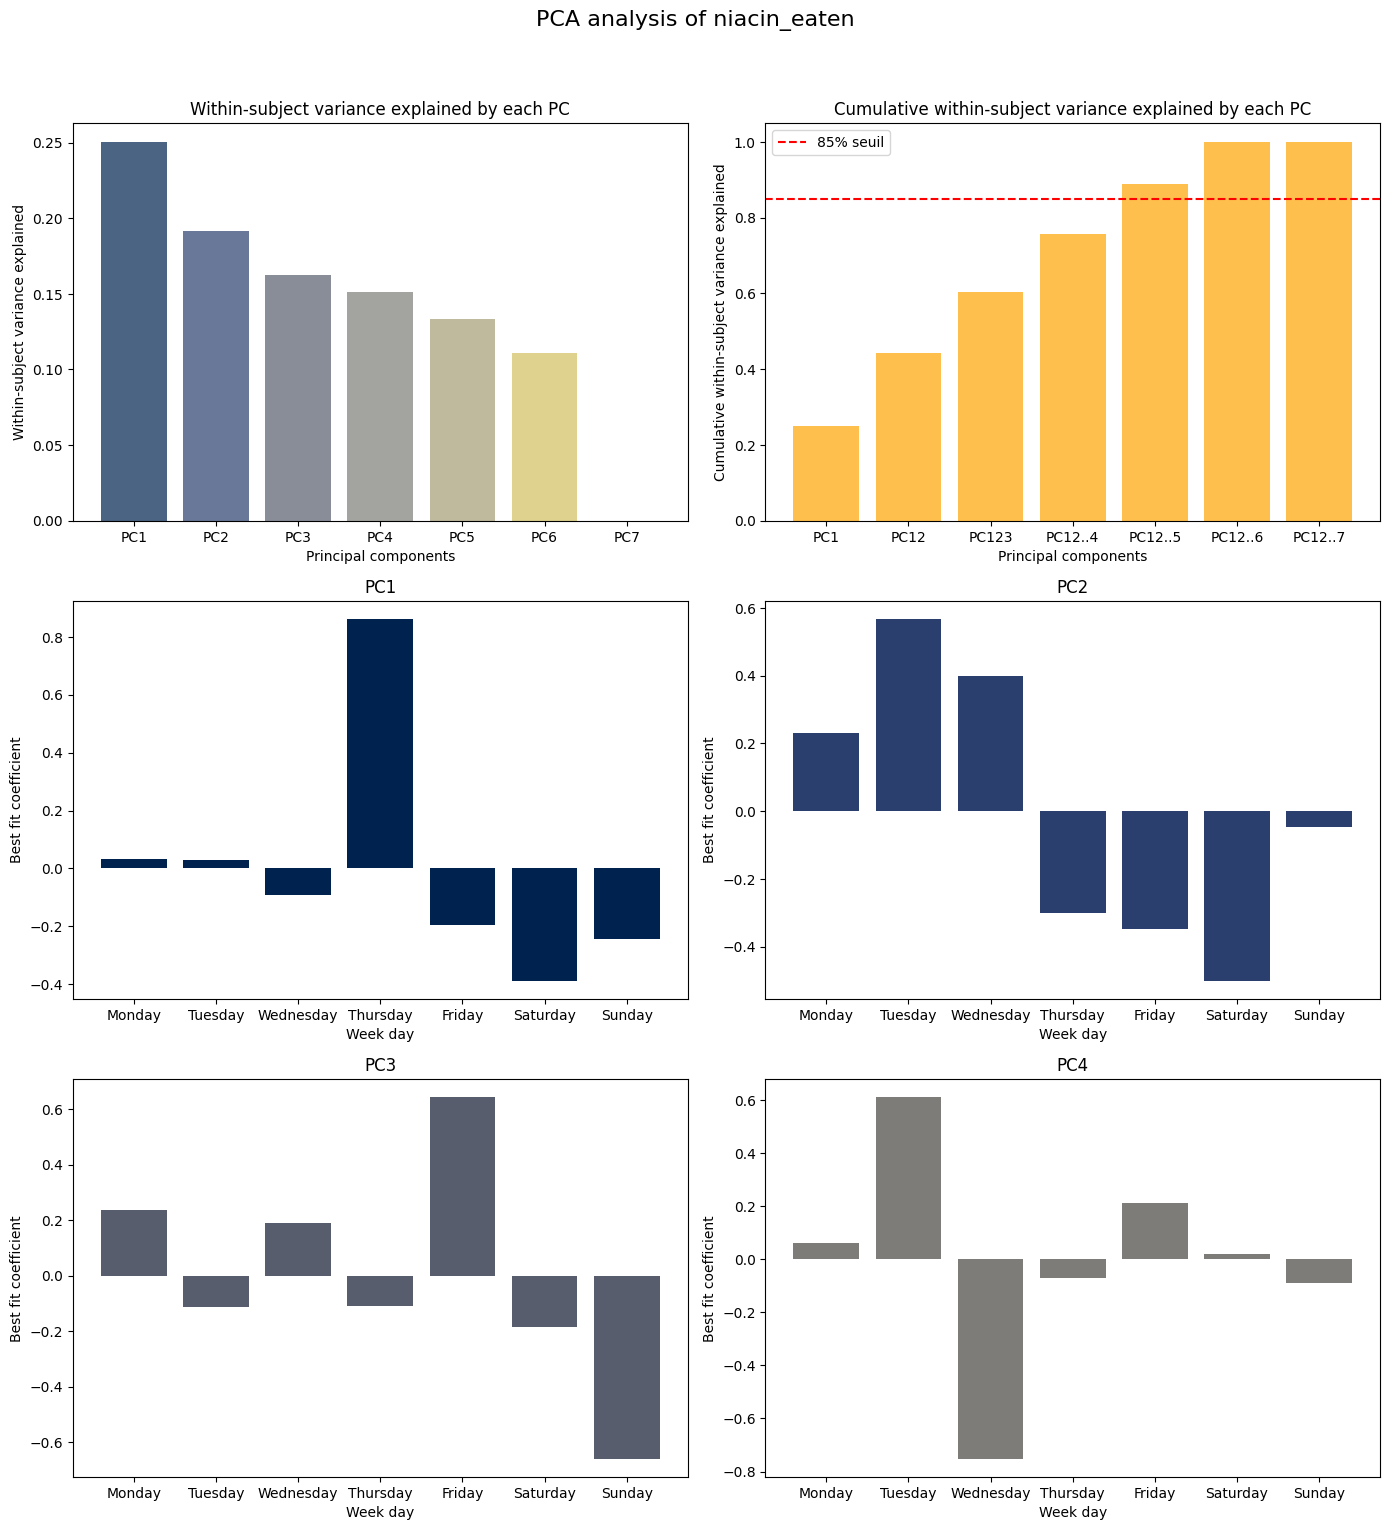

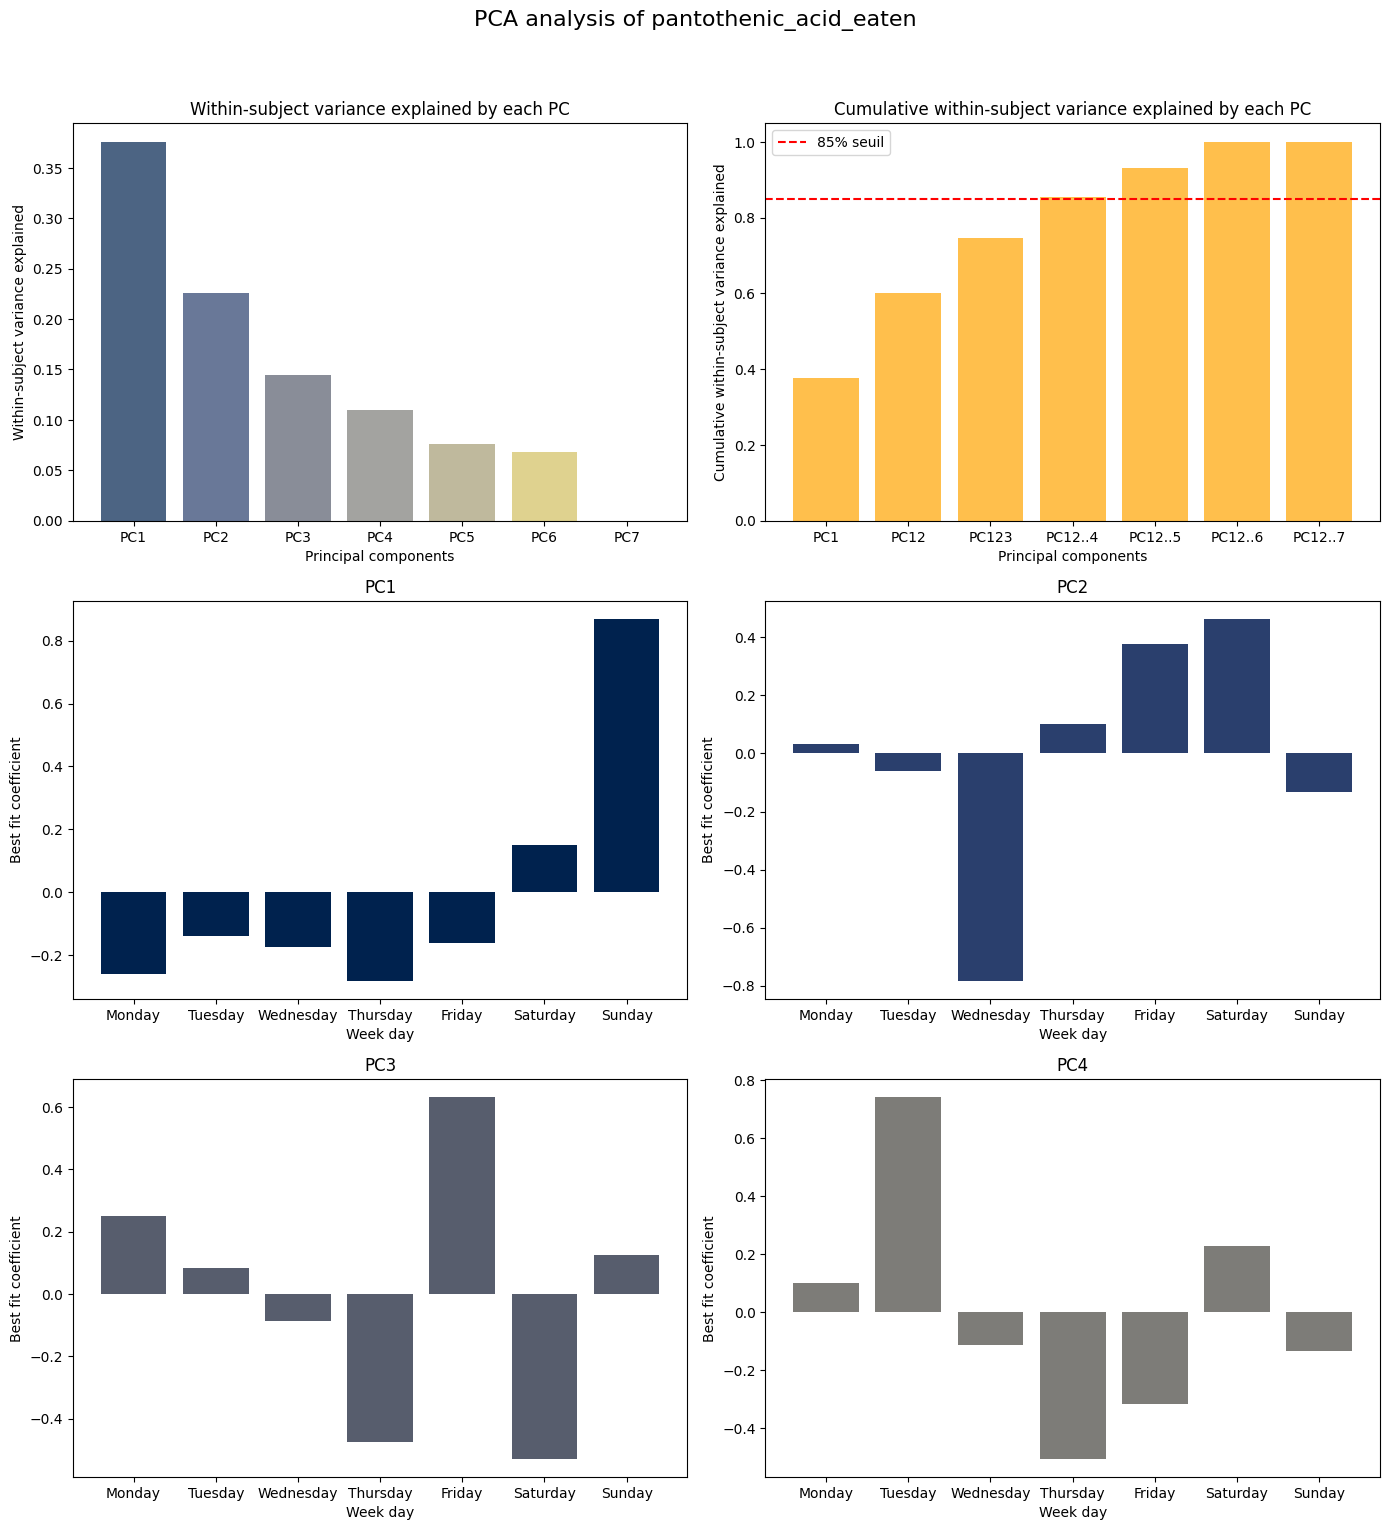

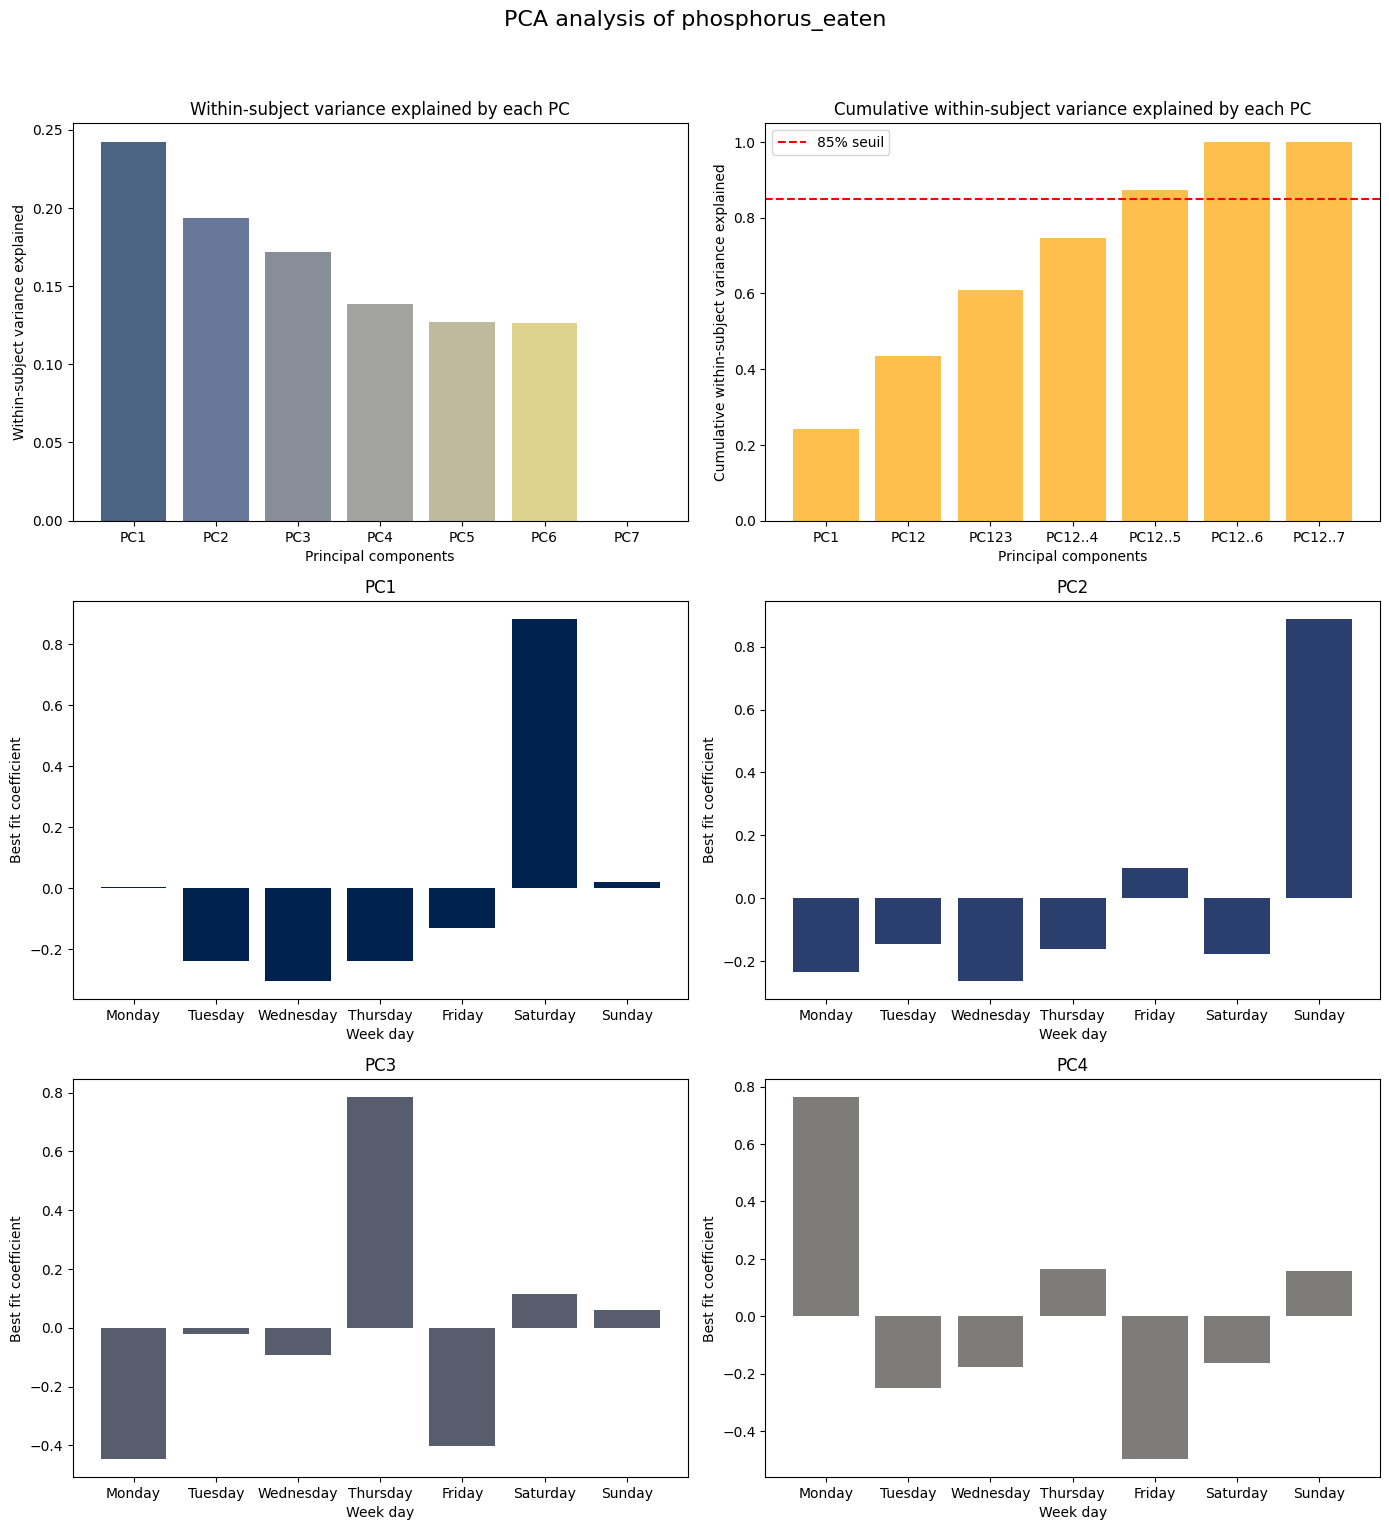

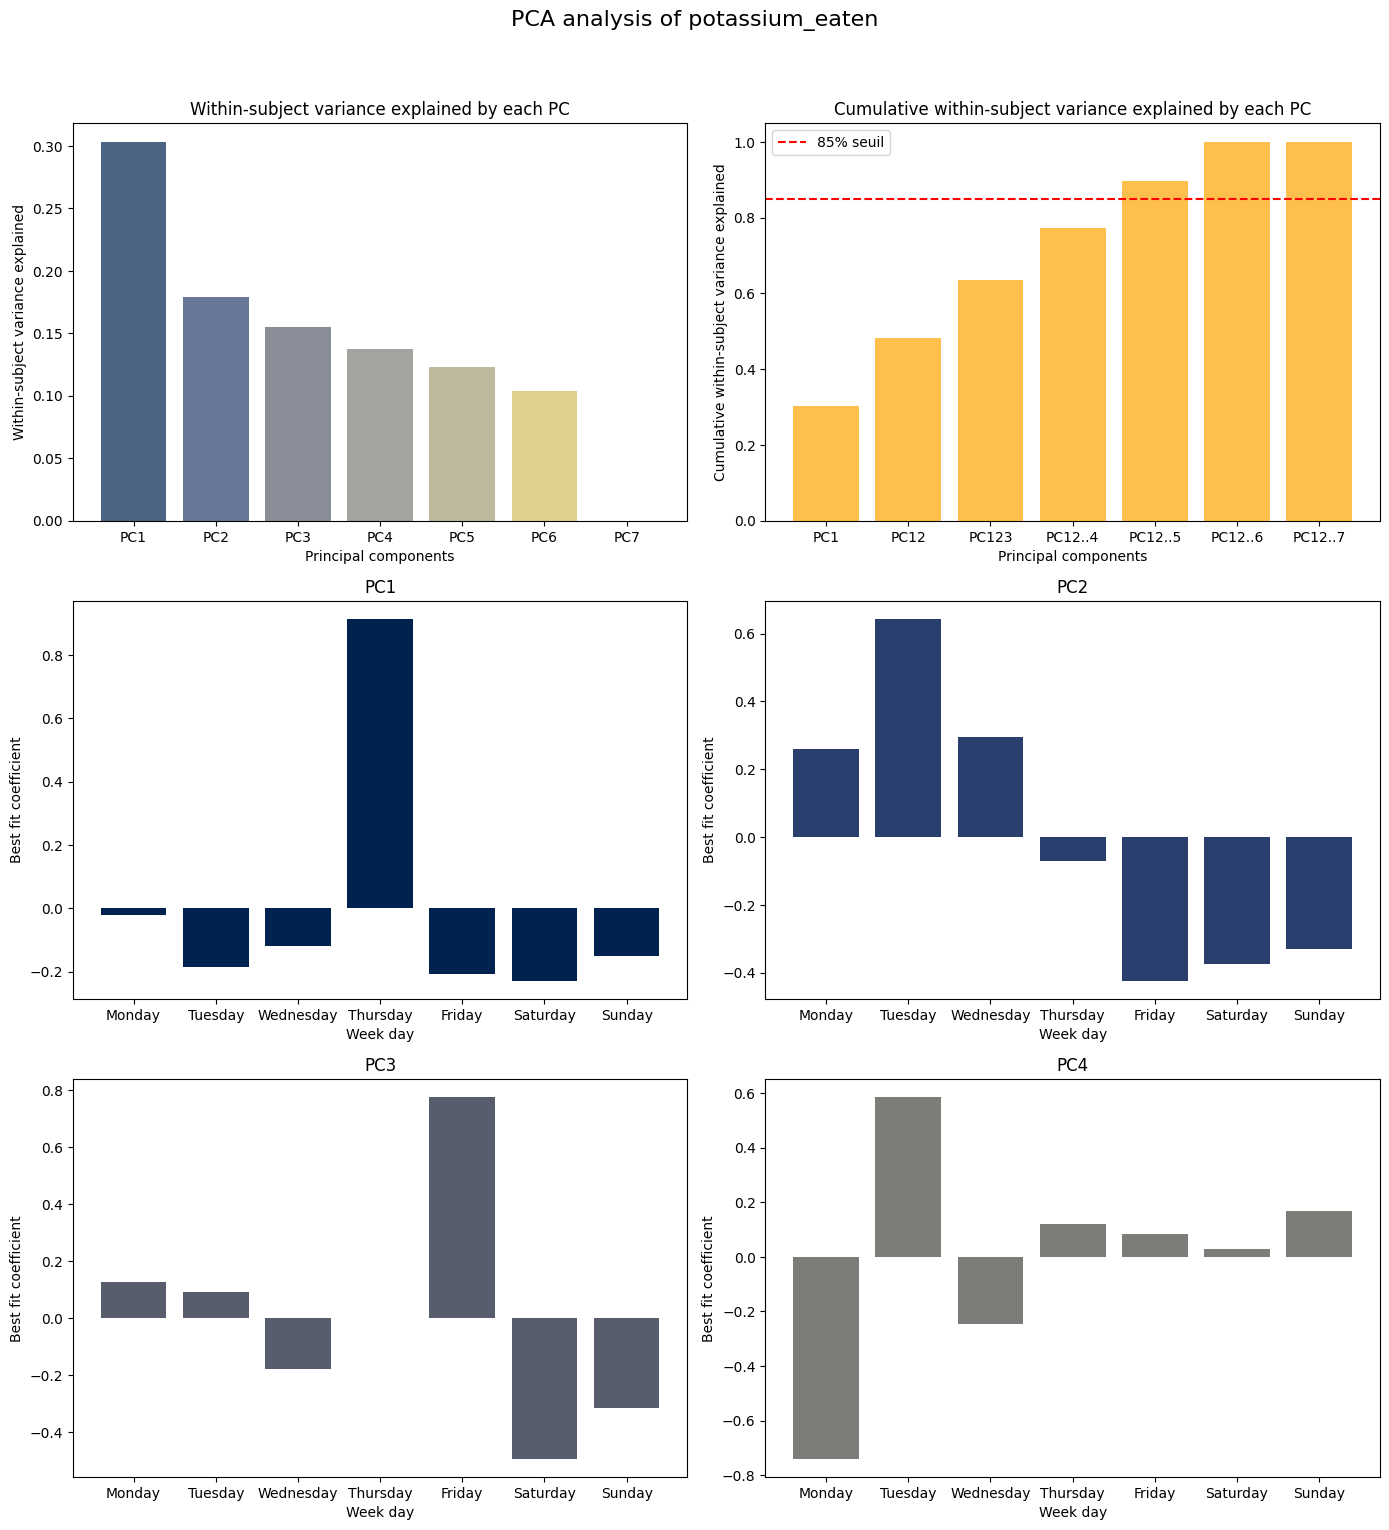

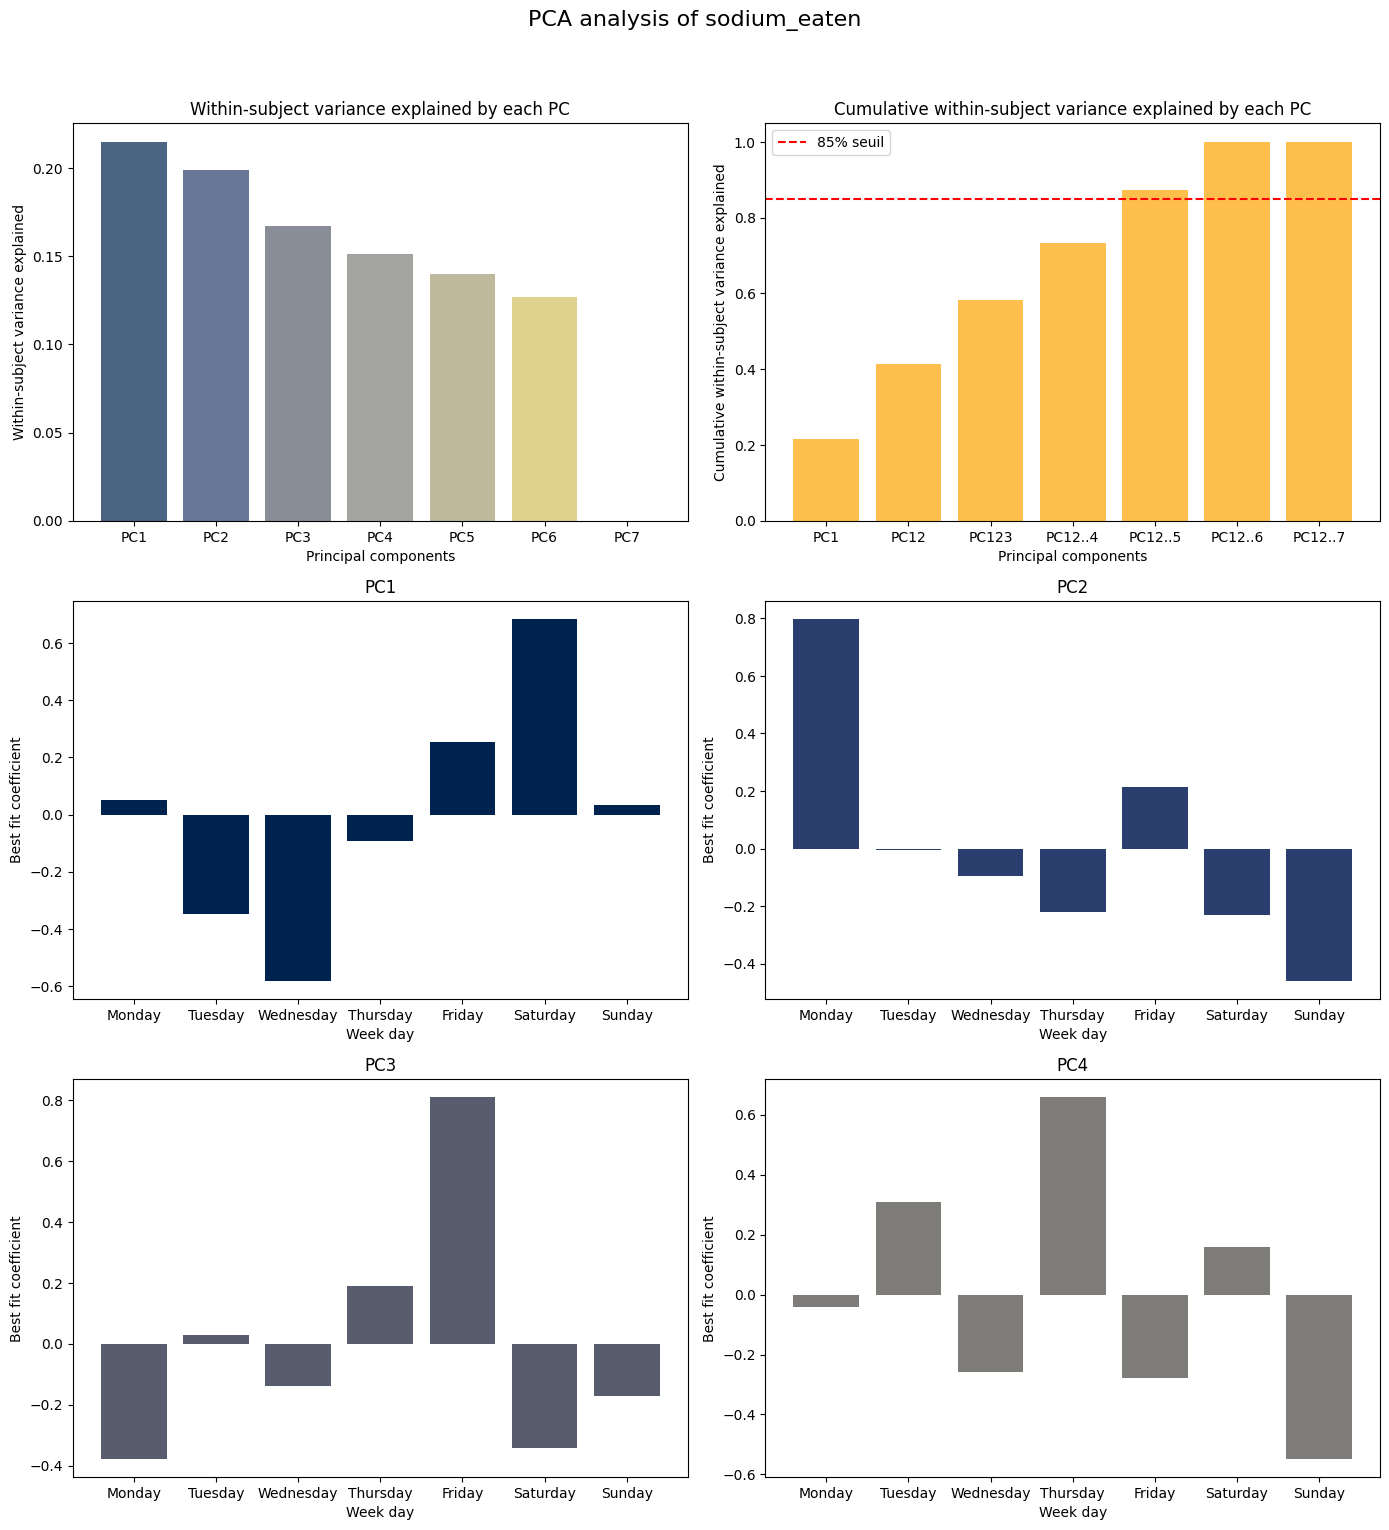

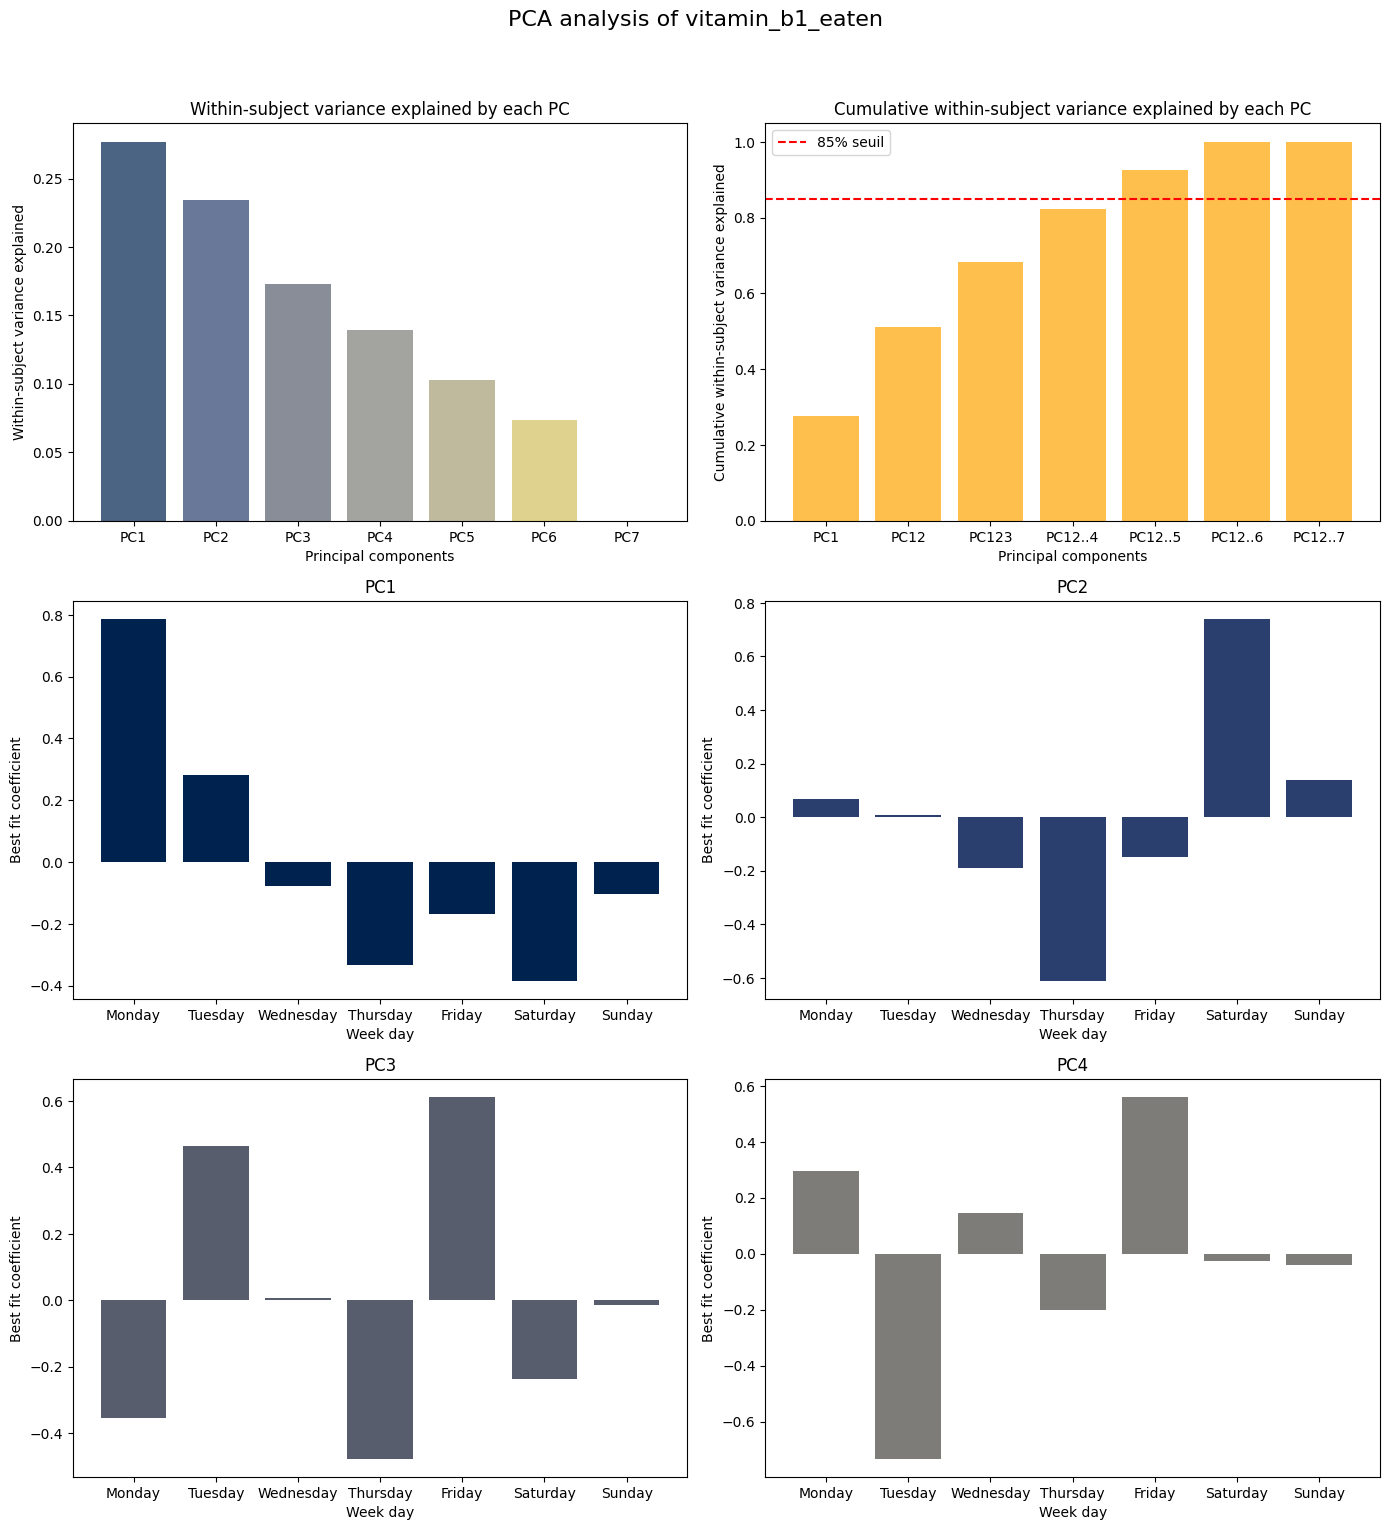

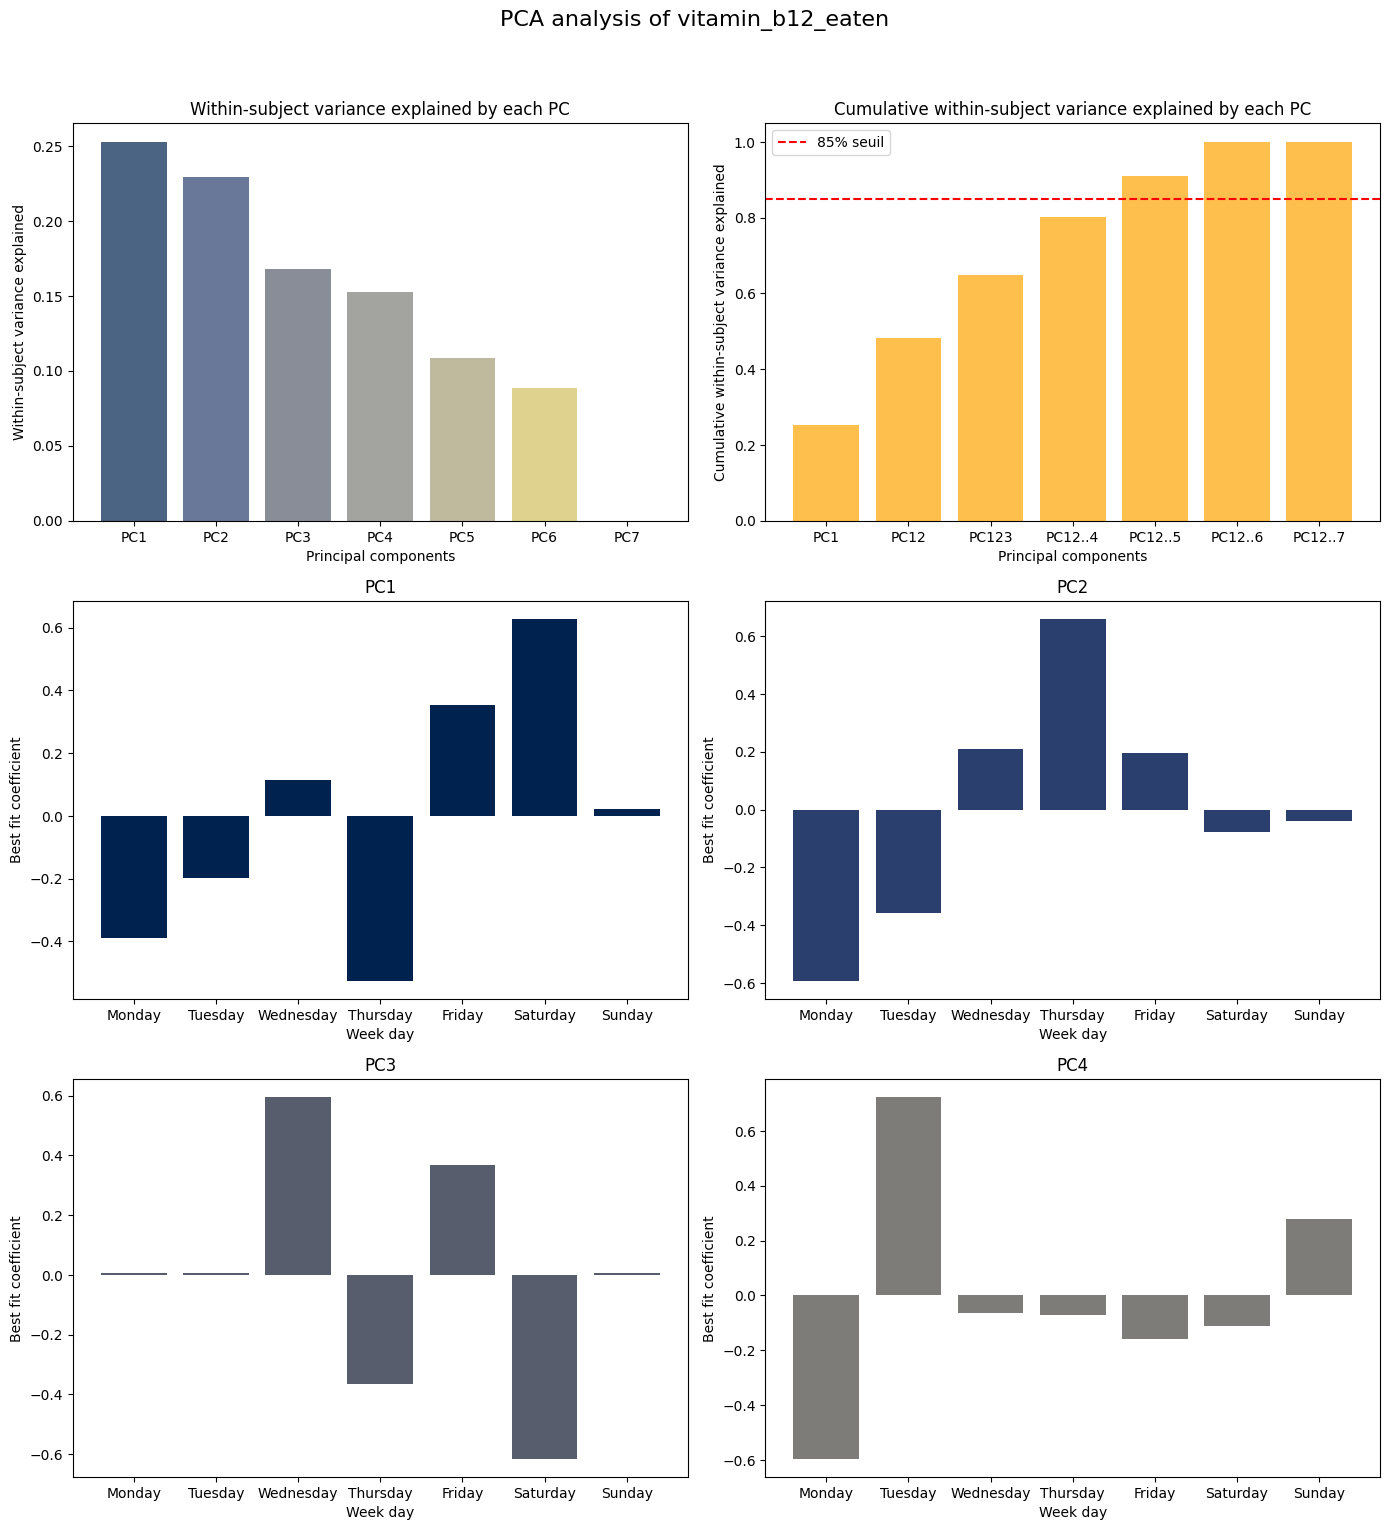

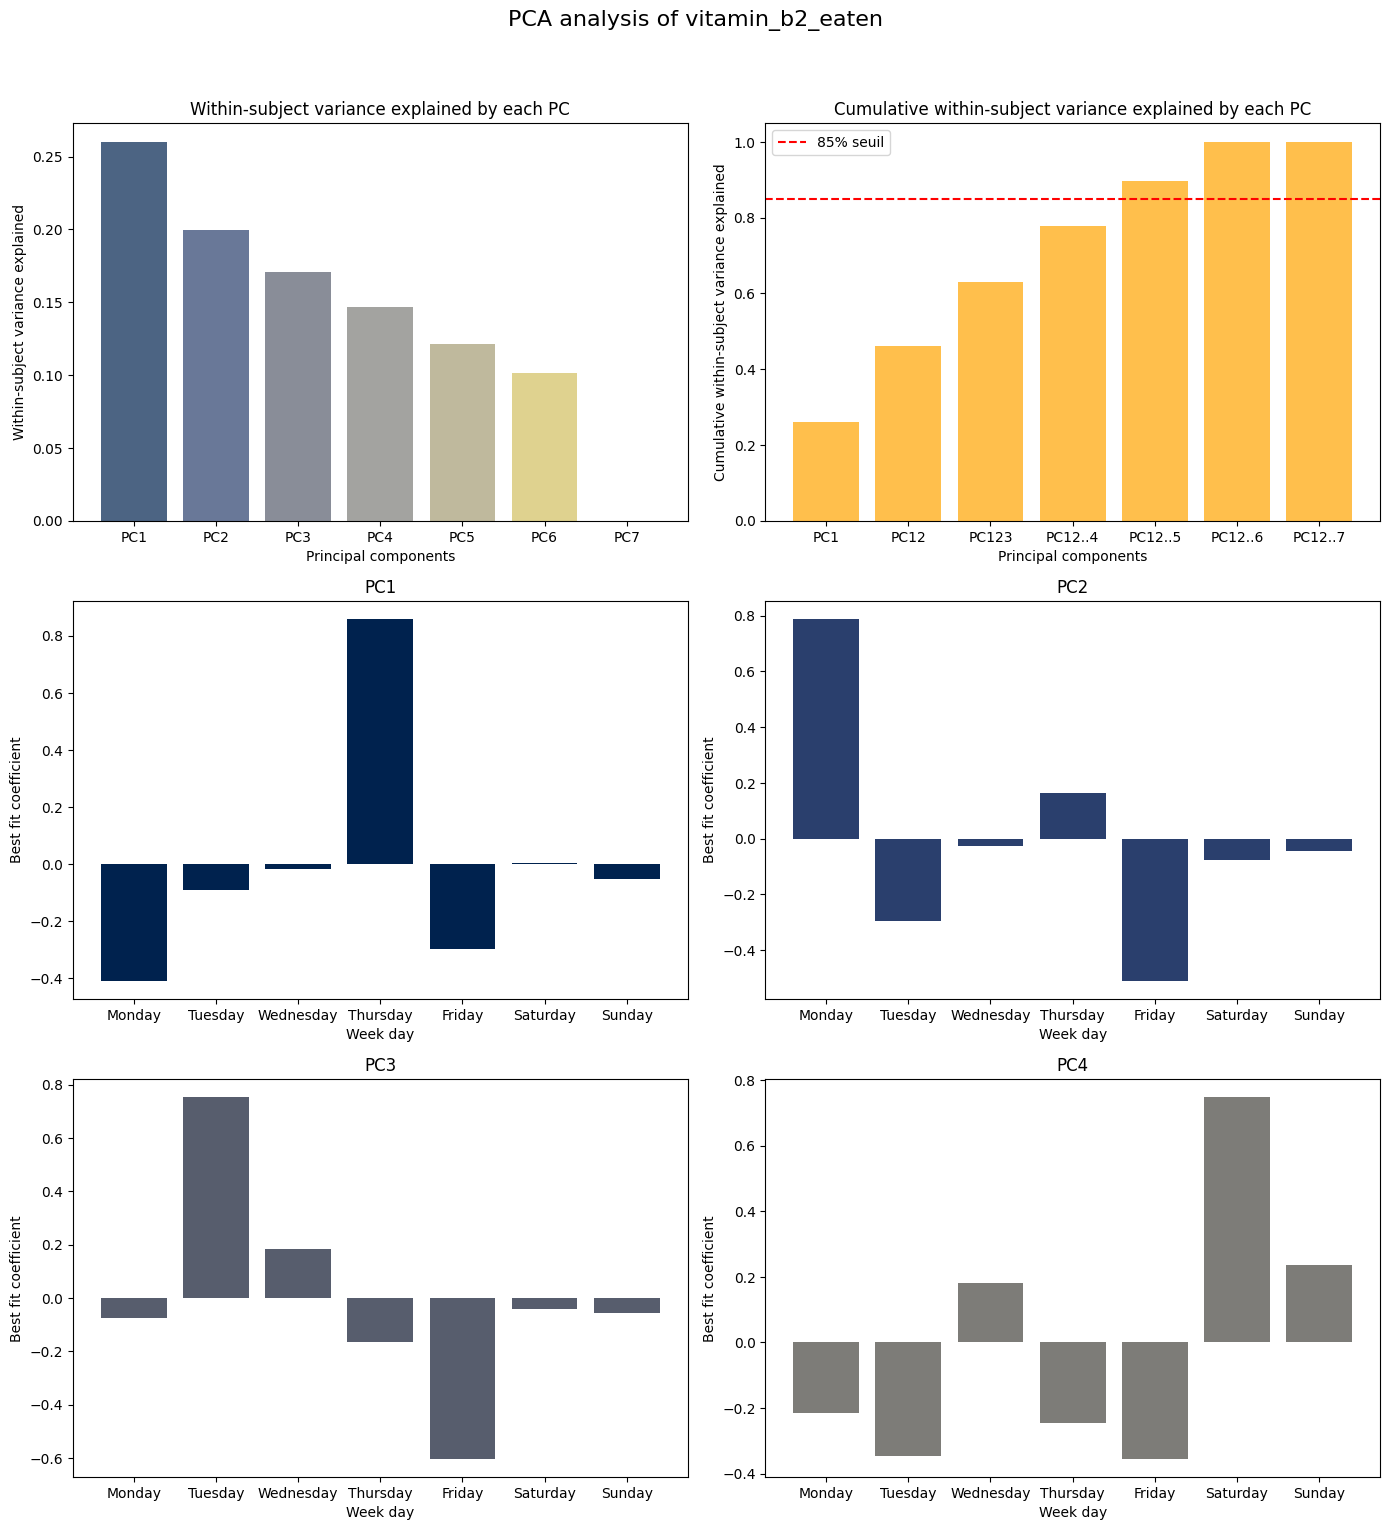

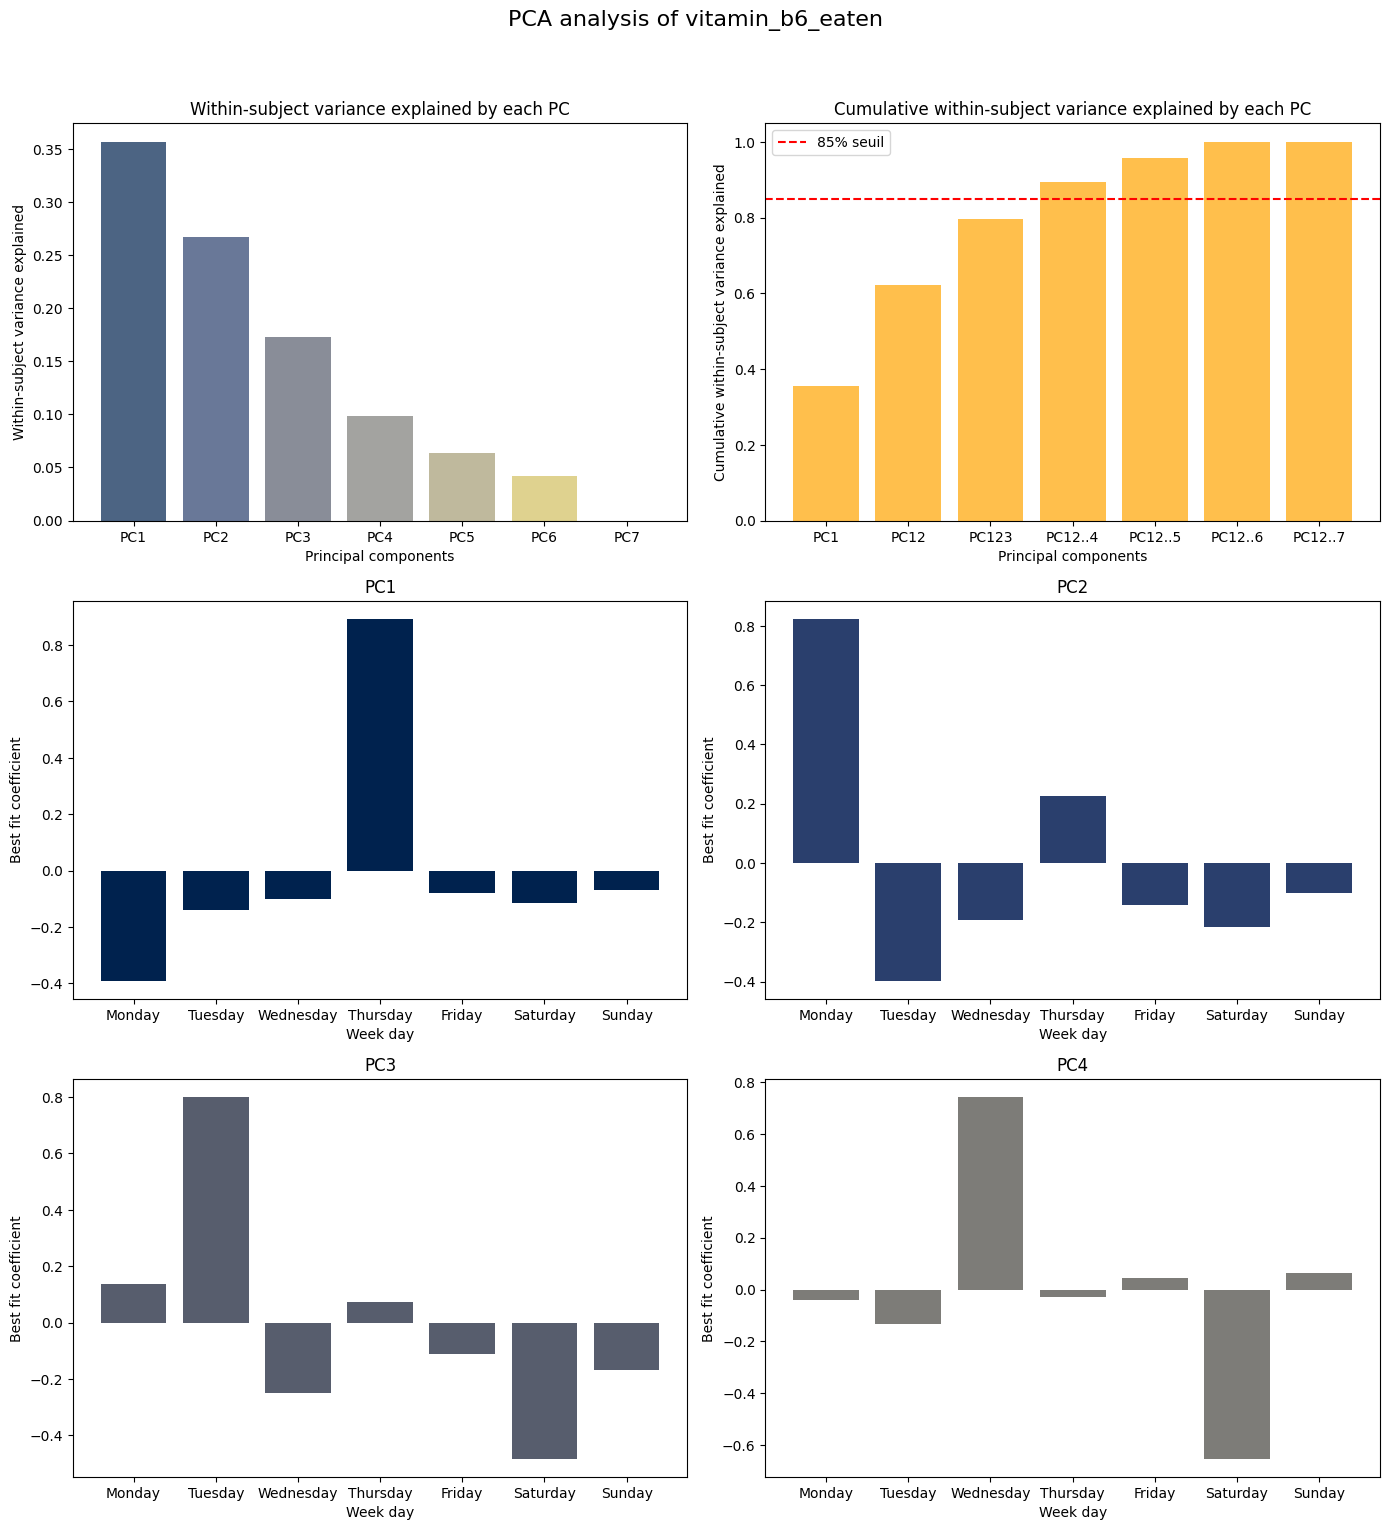

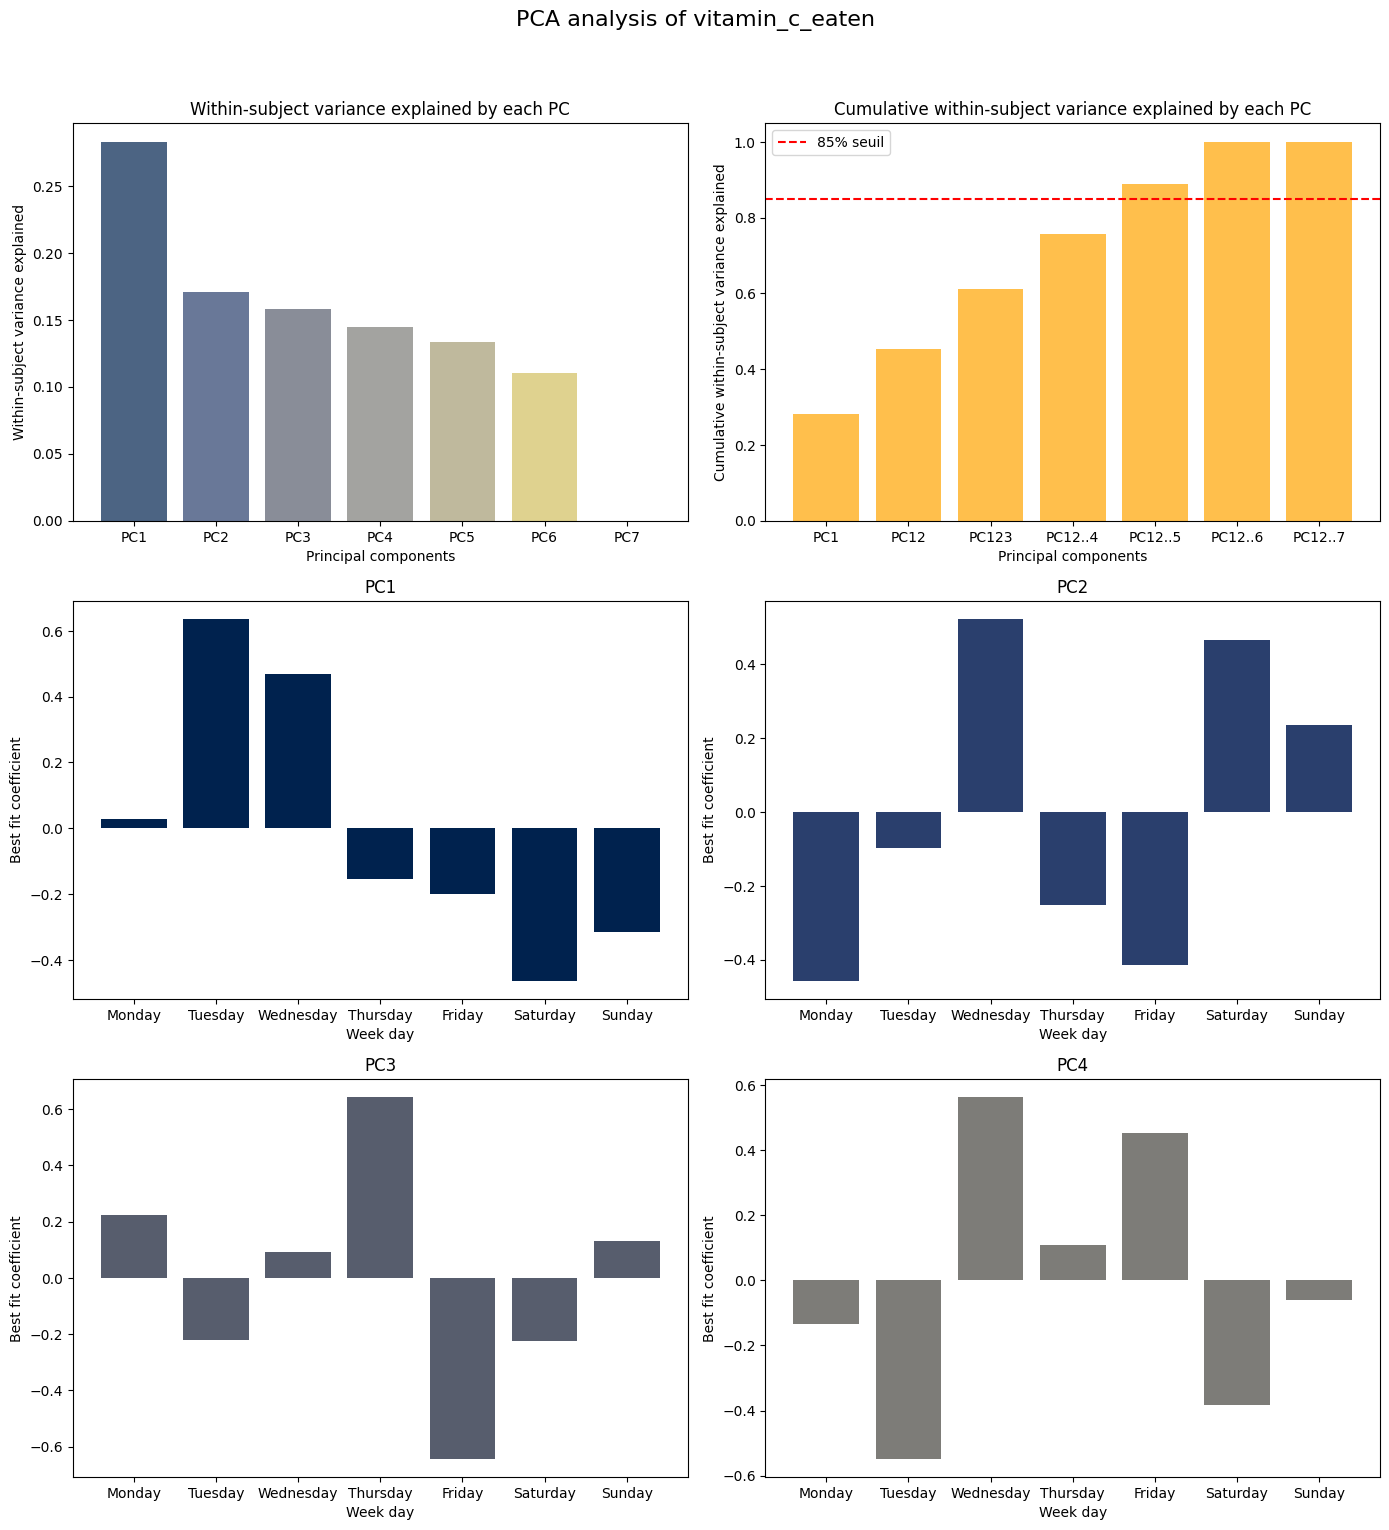

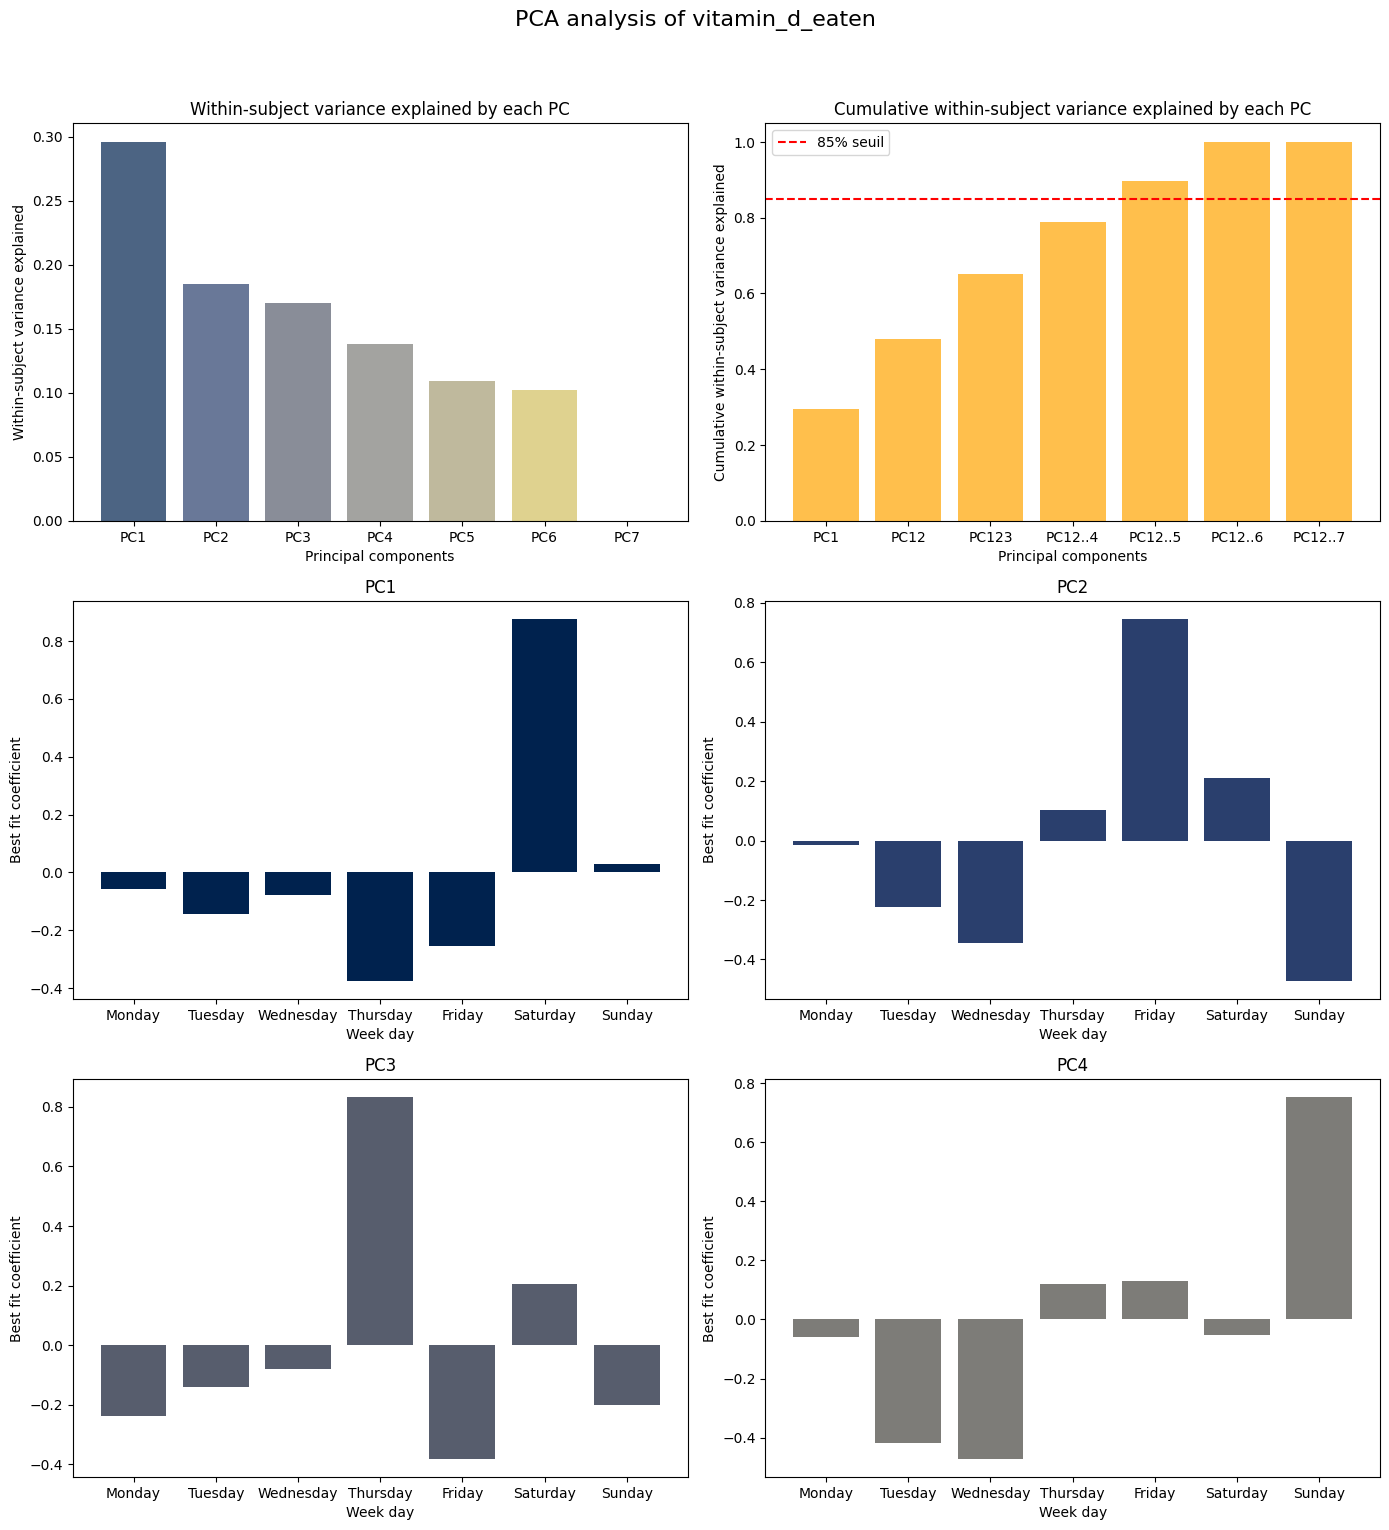

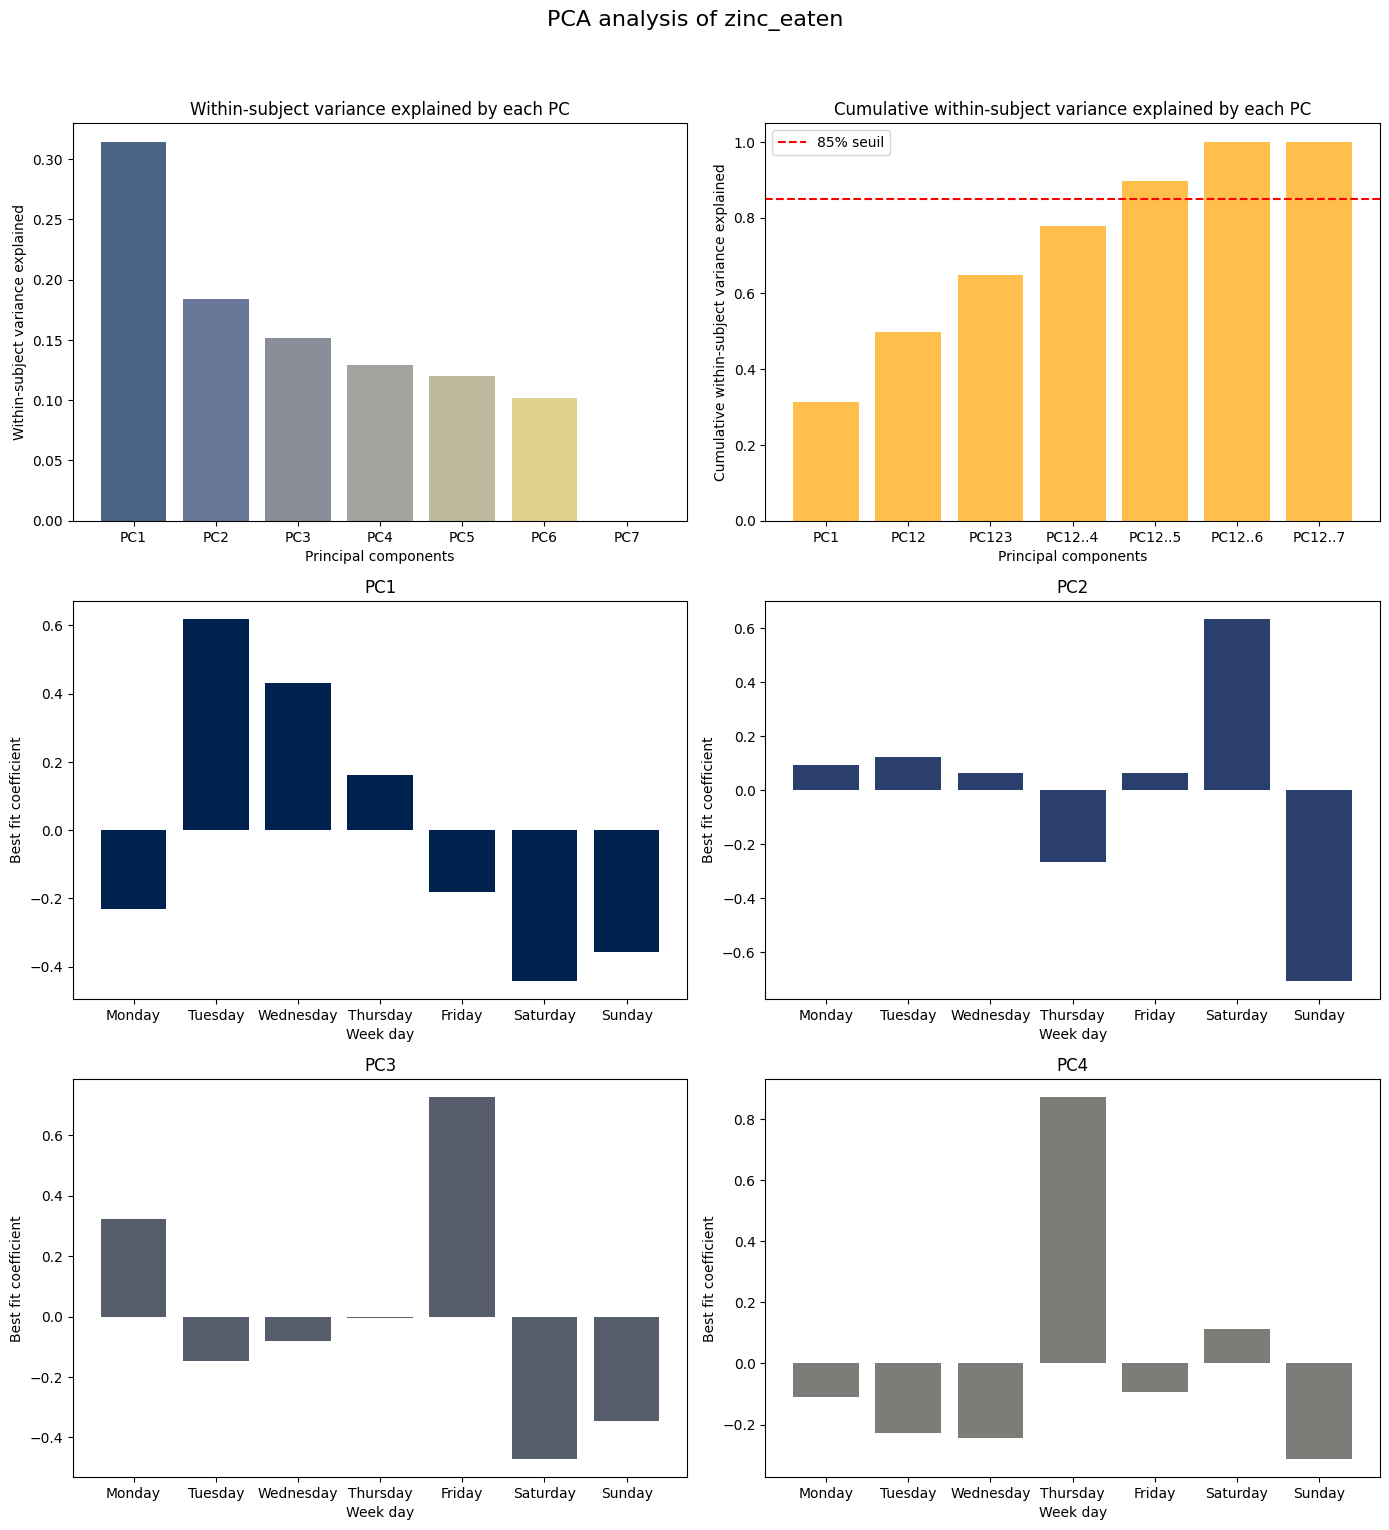

In [6]:
micro = load_dict_list("Food_group/Micronutrients.pkl")
for f in micro:
    plot_PCA_intra_subject(f)

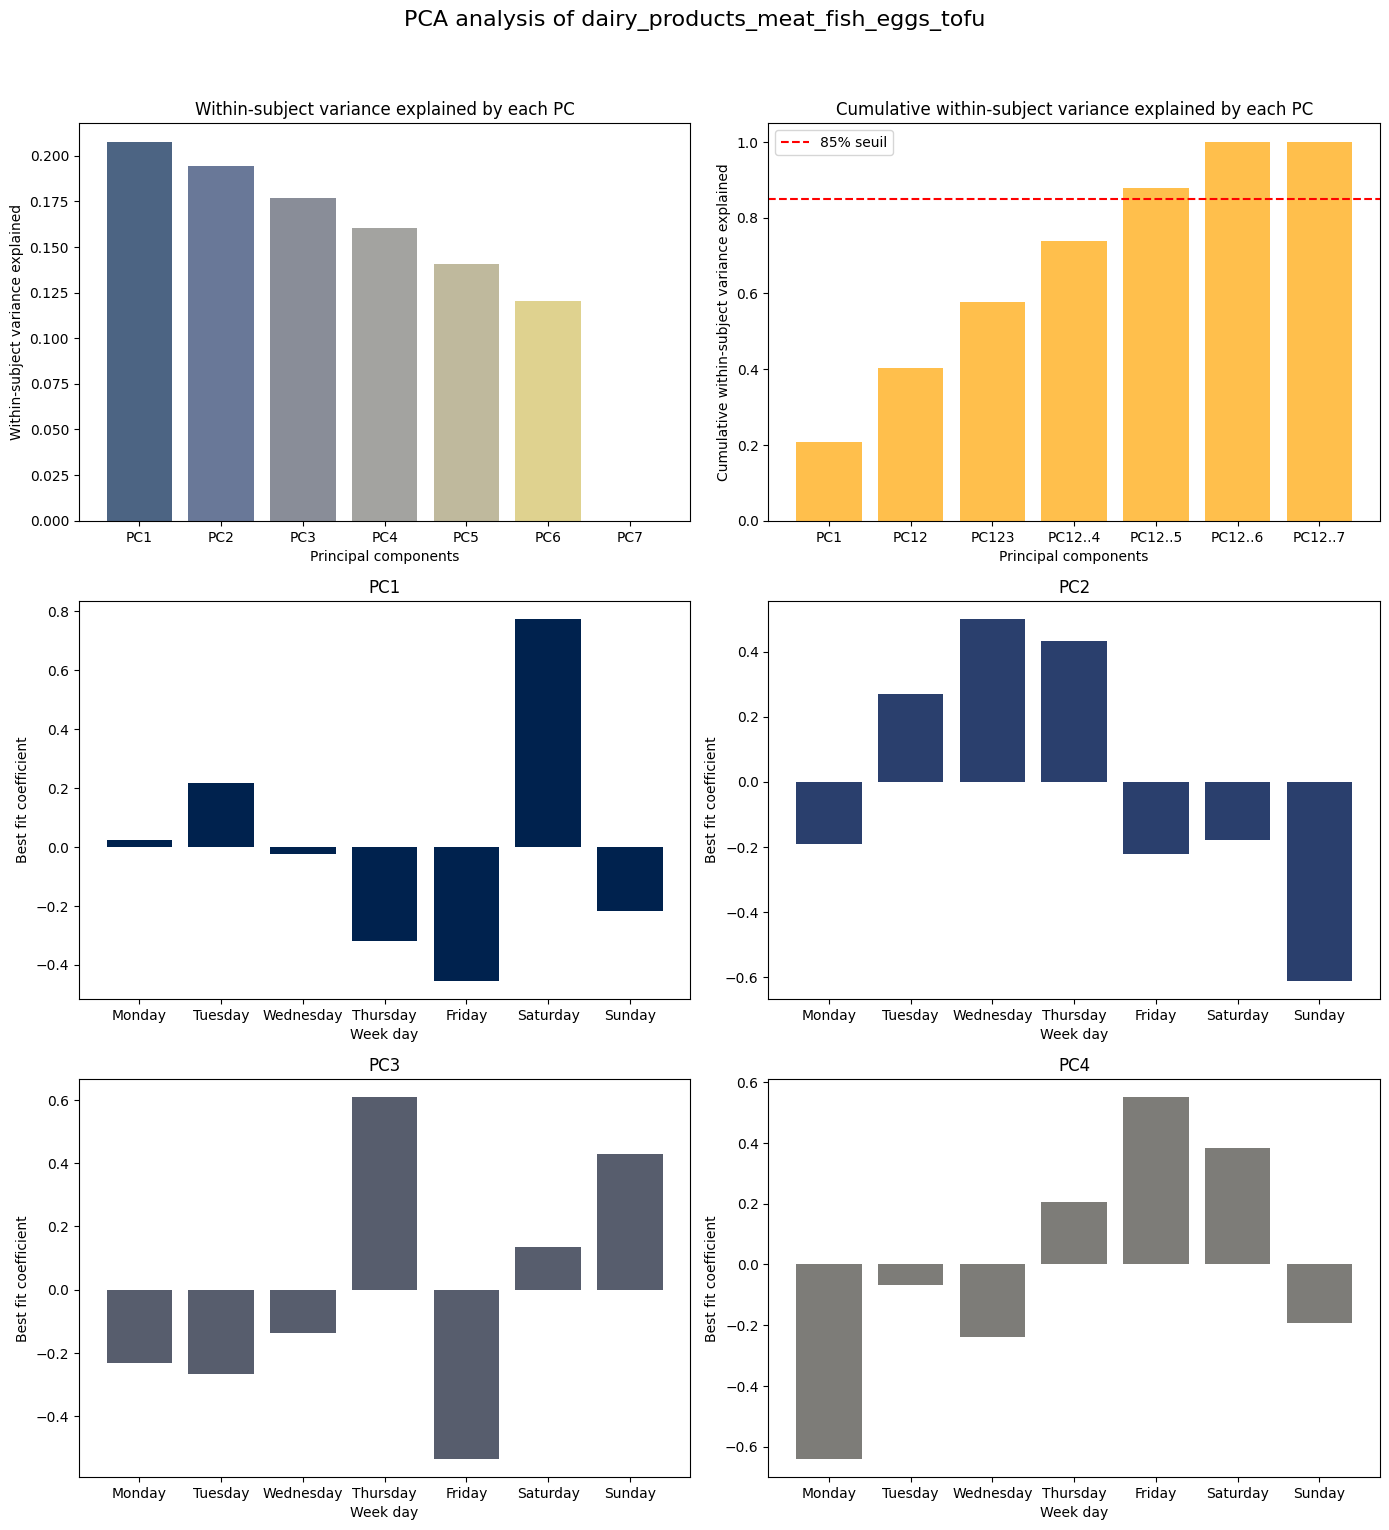

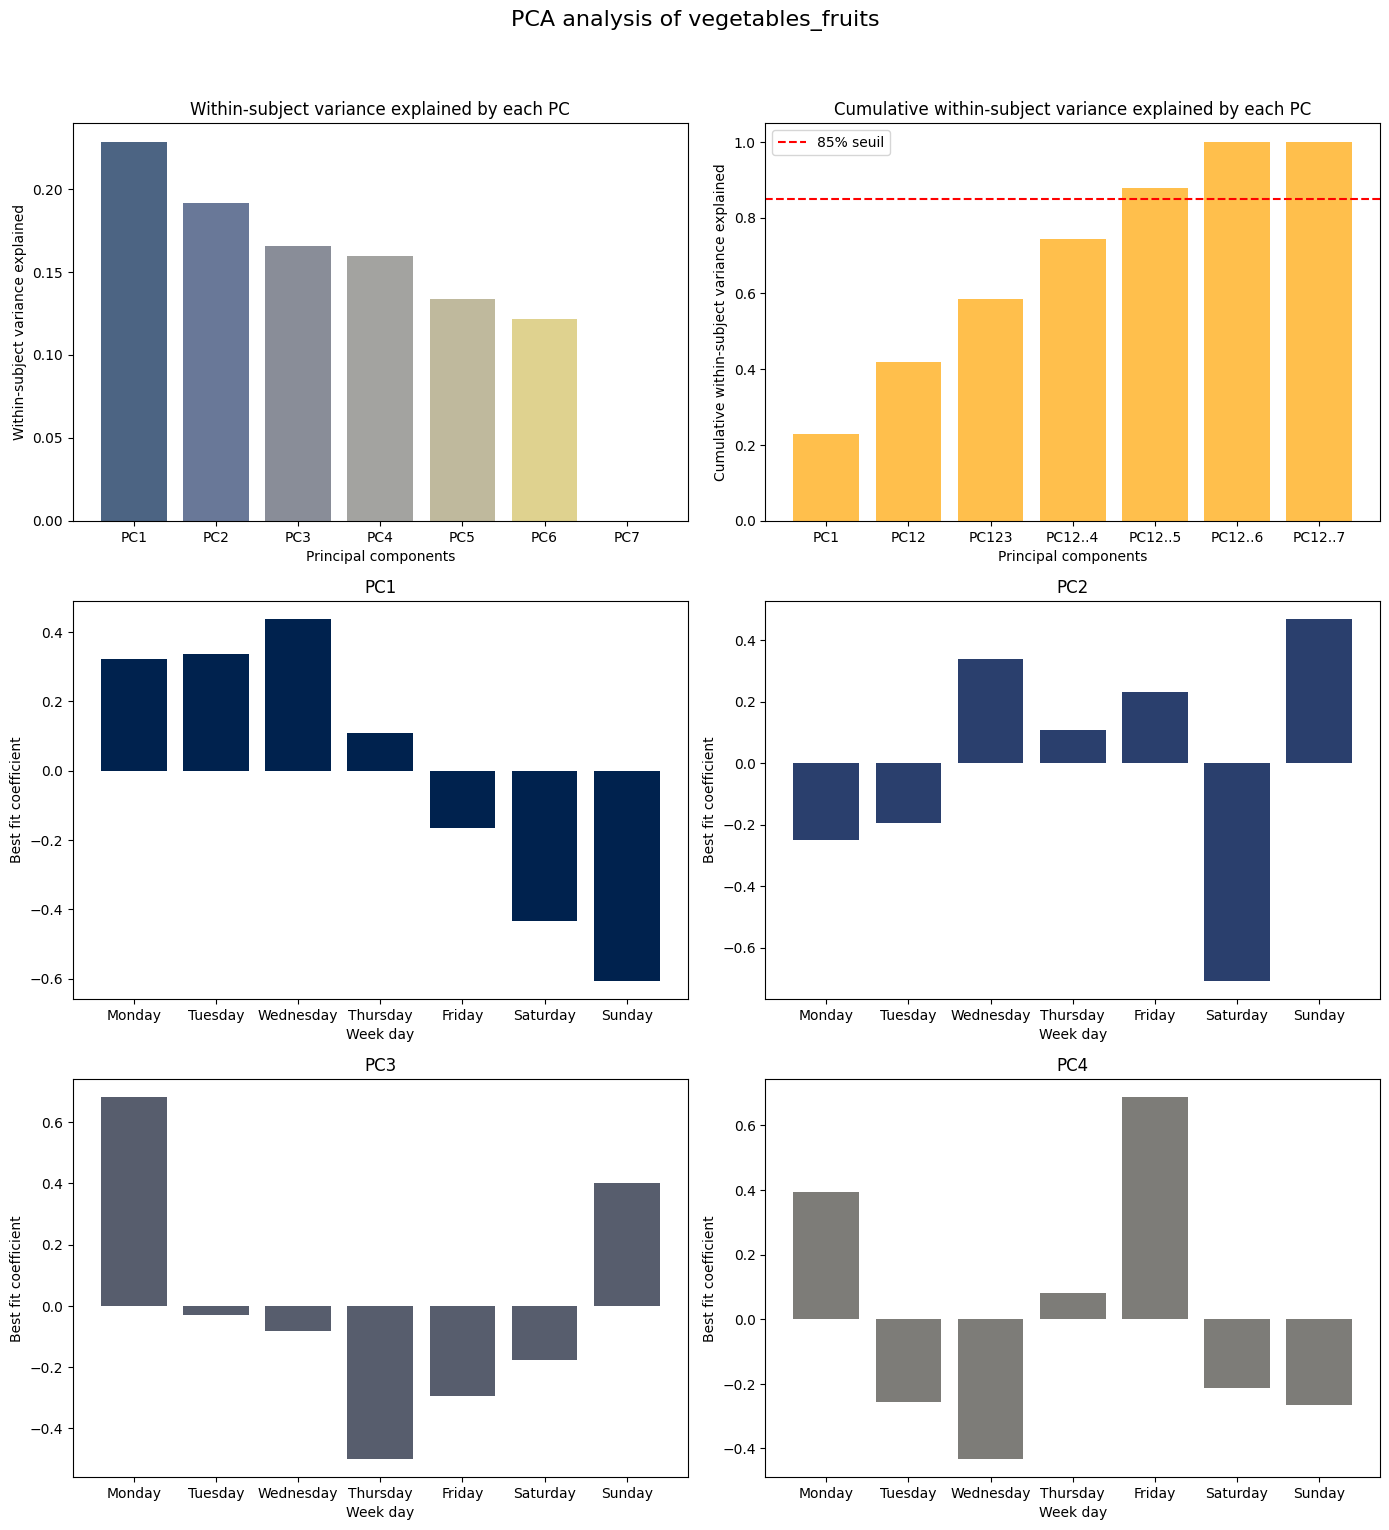

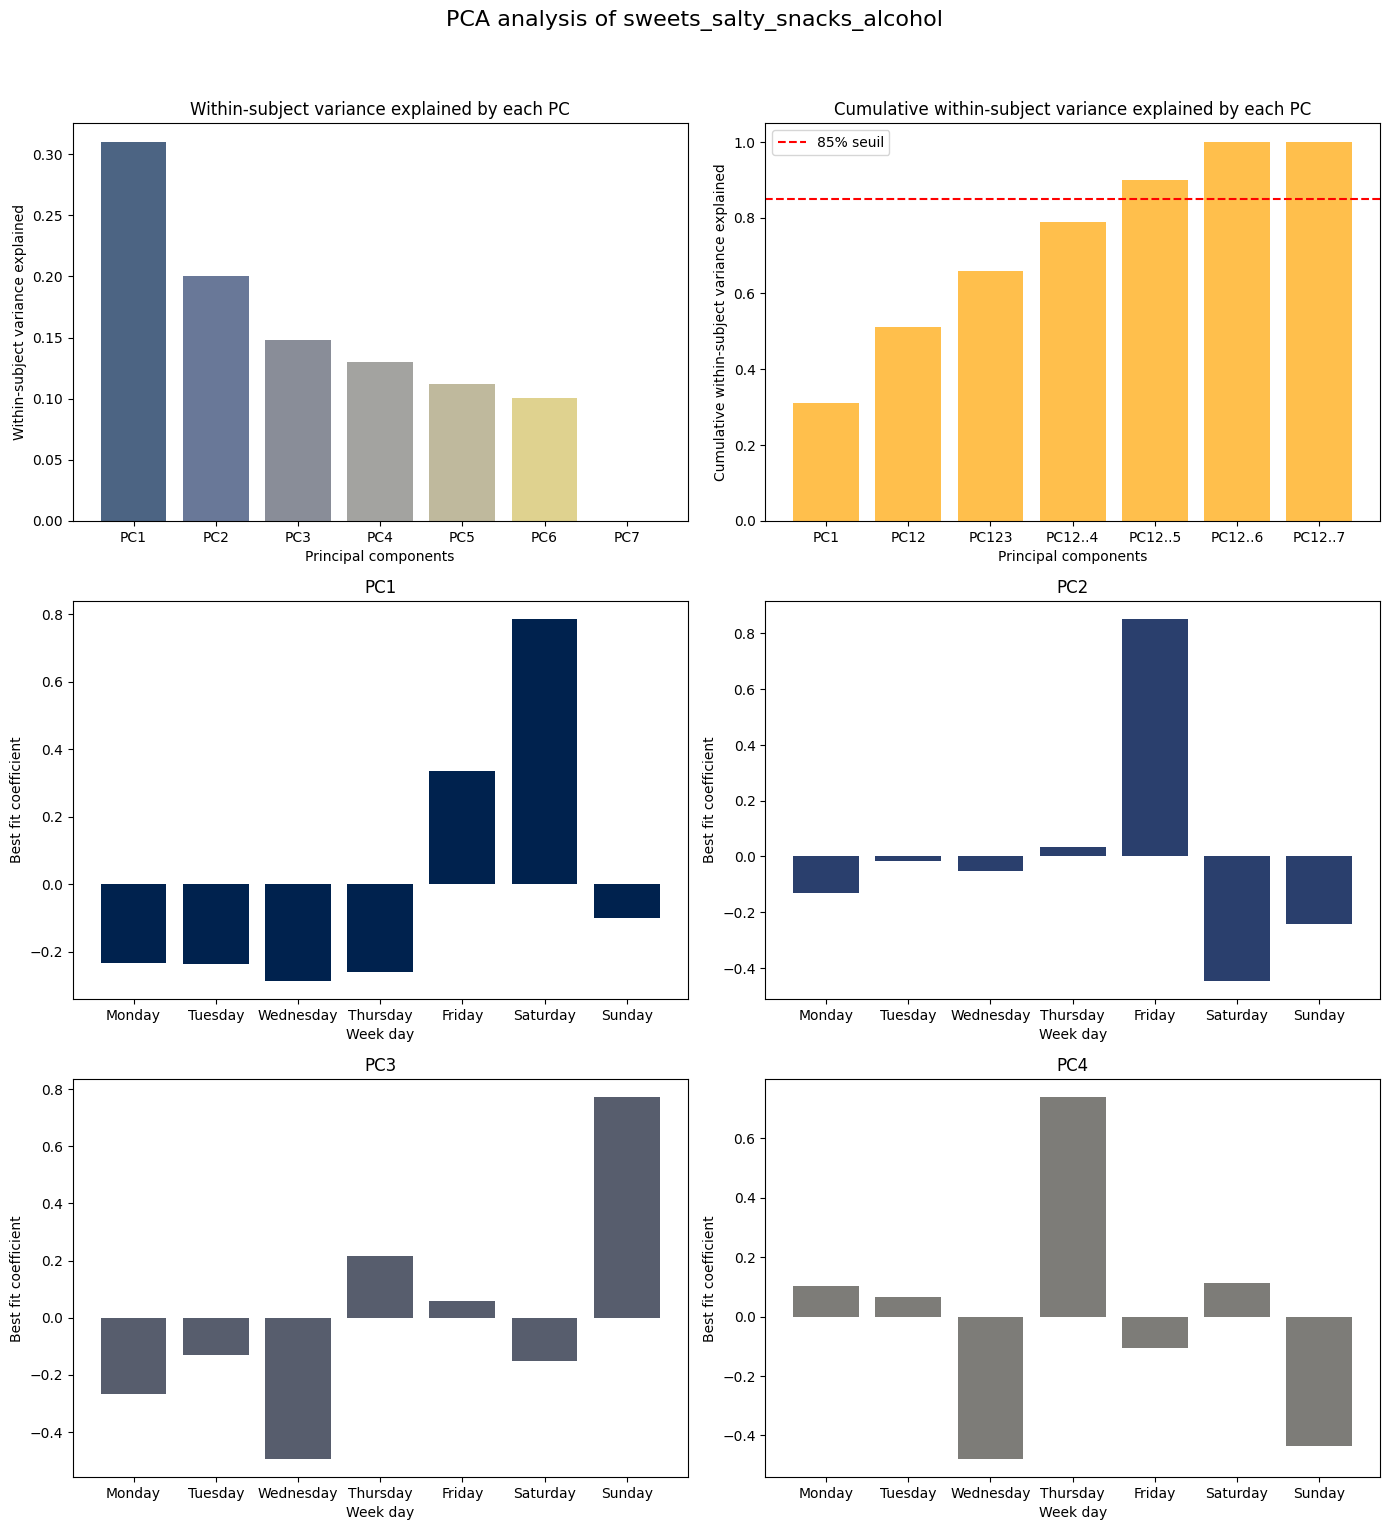

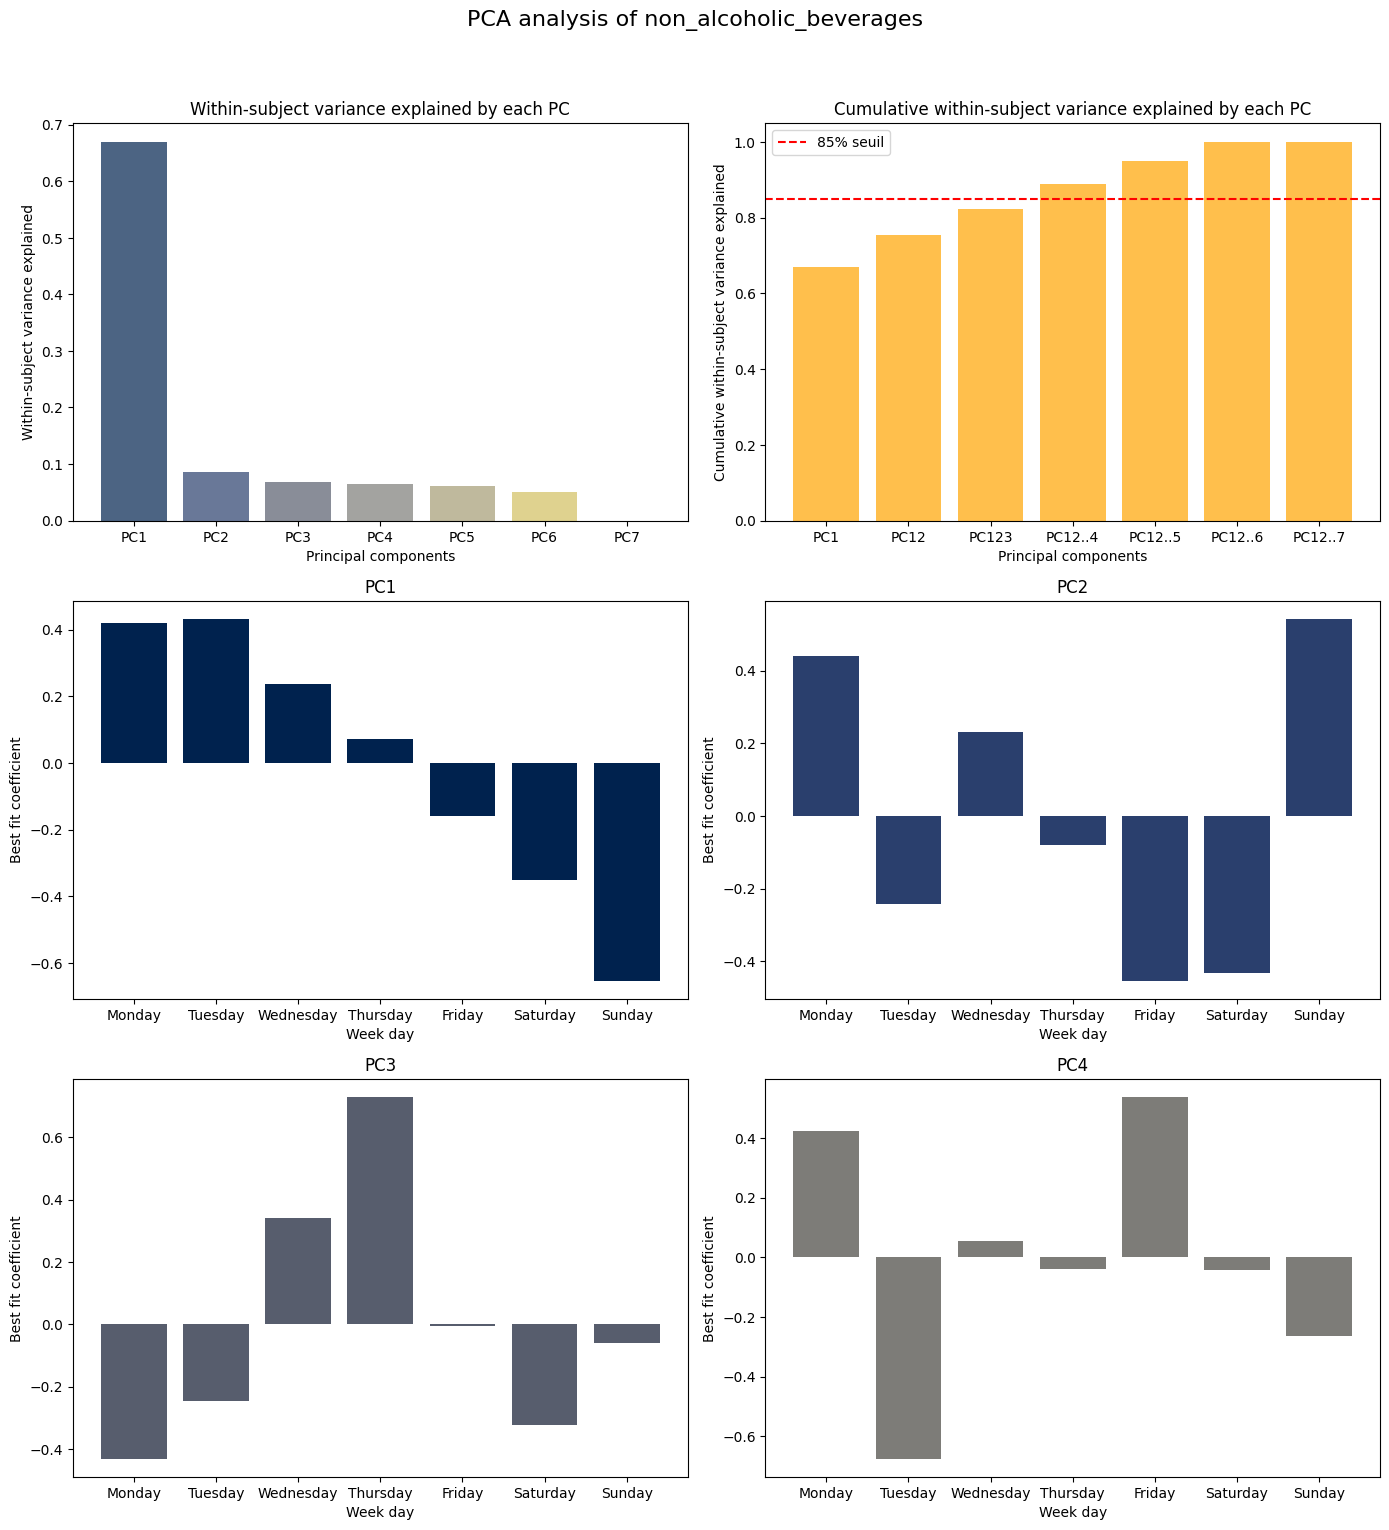

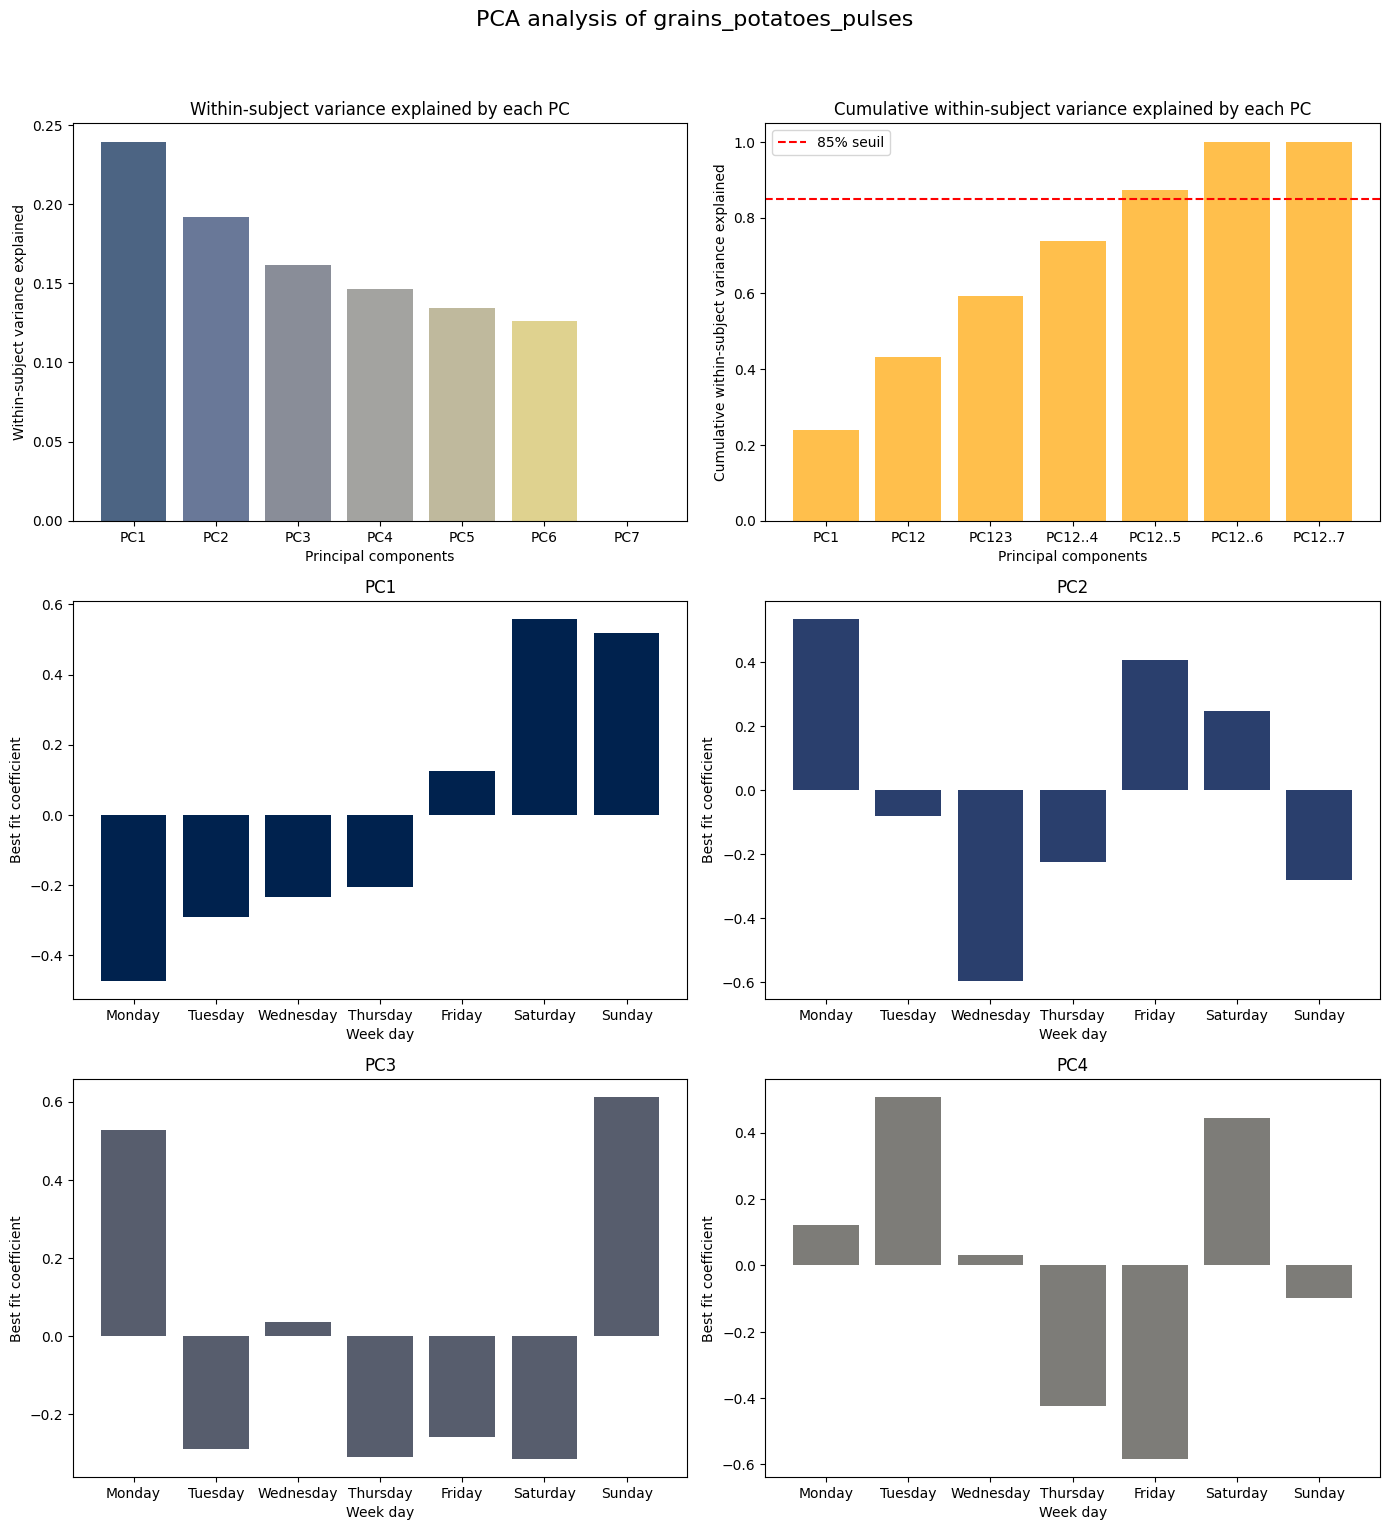

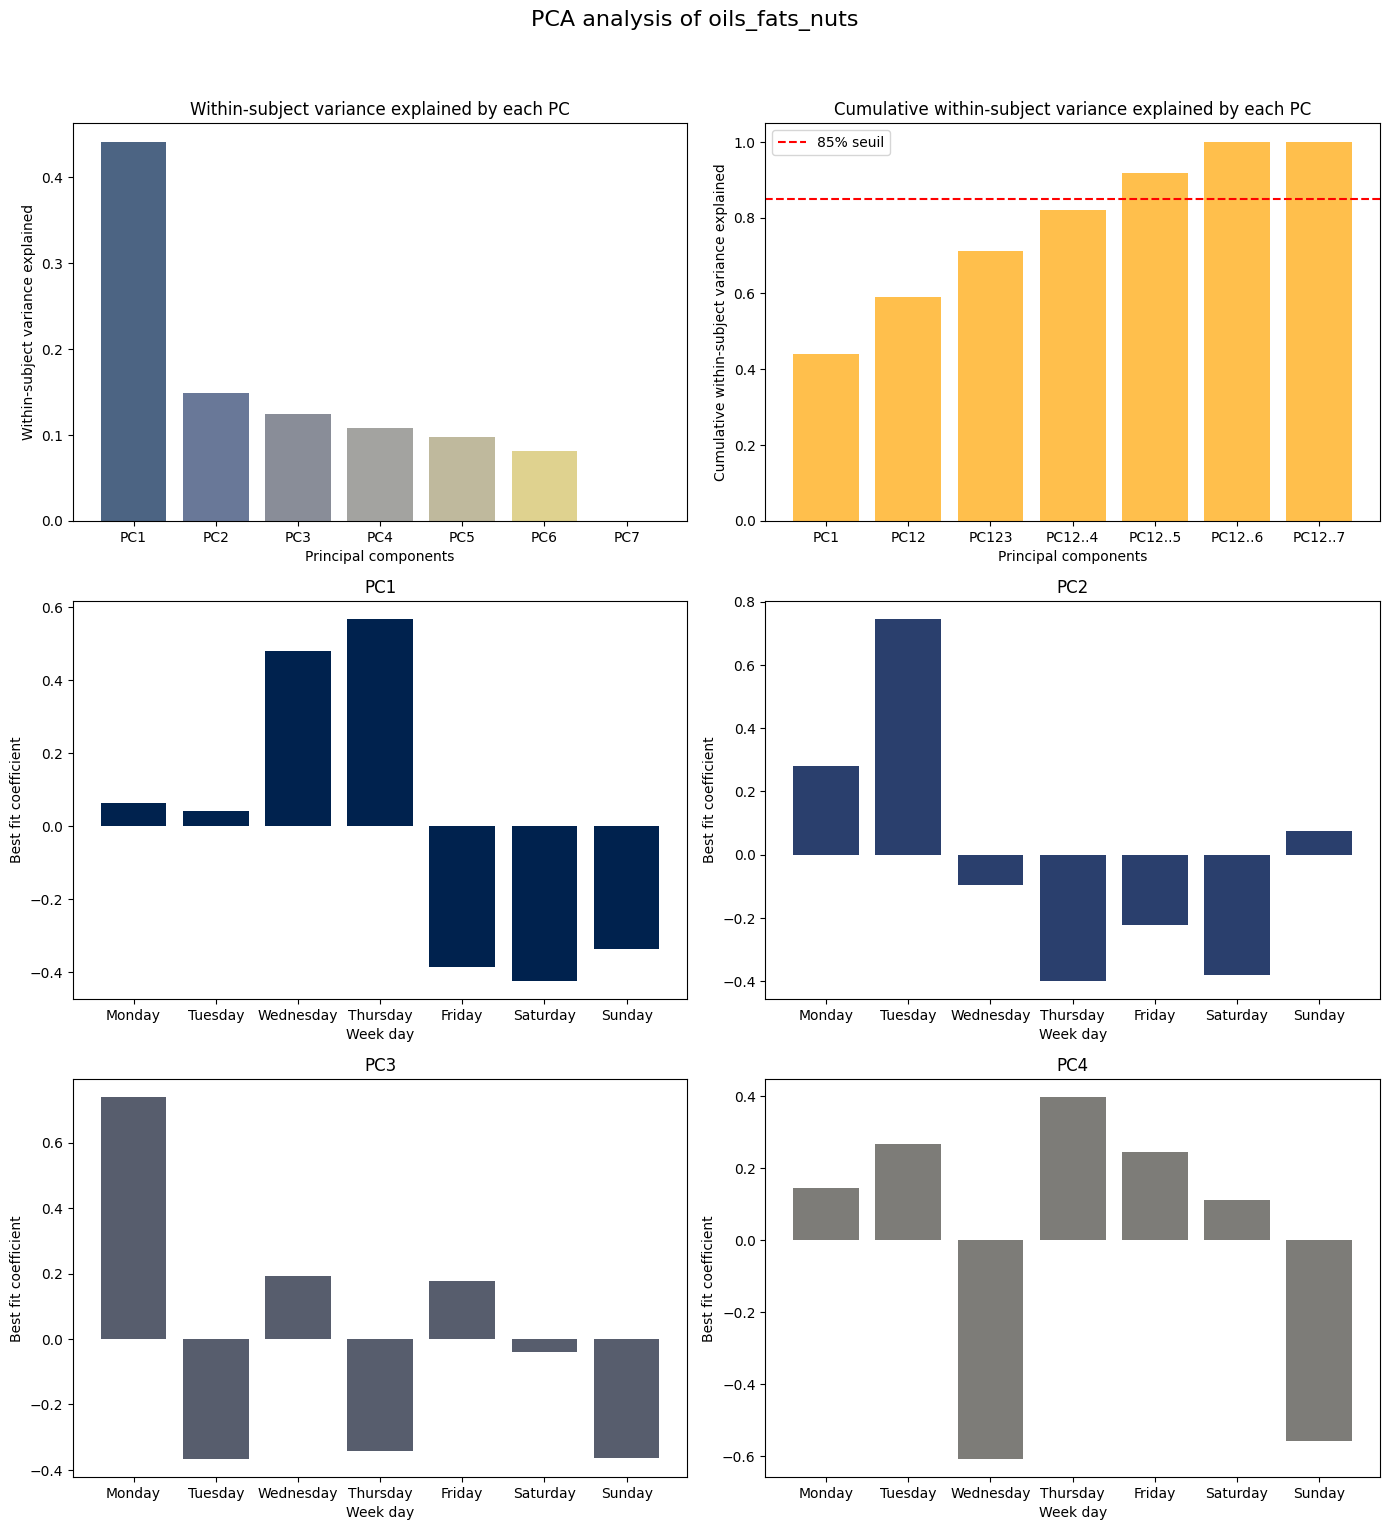

In [7]:
food = load_dict_list("Food_group/food_type.pkl")
for f in food:
    plot_PCA_intra_subject(f)